# Importing Libraries for Project

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping

# Other
from collections import Counter
from scipy.stats import ttest_ind


In [2]:
# Load the Excel files- Richard
players_df = pd.read_excel(r"C:\Users\Richard Kianos\Downloads\2025_cbb_player_stats.xlsx")
team_net_df= pd.read_excel(r"C:\Users\Richard Kianos\Downloads\2025_team_stats_net.xlsx")

In [3]:
# Load the Excel files- Dustin
#players_df = pd.read_excel("C:/Users/hittd/OneDrive/Documents/DAT 490/merge/original regular season player stats dataset.xlsx")
#team_net_df = pd.read_excel("C:/Users/hittd/OneDrive/Documents/DAT 490/2025 team and net stats_2.xlsx")

In [4]:
# Load the Excel files - Kyle
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#players_df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/player_data.xlsx')
#team_net_df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/team_stats_net.xlsx')


# Dataset Exploration

In [5]:
# Standardizing all Columns
for df in [team_net_df, players_df]:
    df.columns = (
        df.columns
        .str.strip()
        .str.replace('\n', ' ', regex=True)
        .str.replace(' +', ' ', regex=True)
        .str.upper()  
    )

## Players_df Exploration

In [6]:
print("players_df :", players_df.columns)

players_df : Index(['BIGDATABALL DATASET', 'GAME-ID', 'DATE', 'PLAYER-ID',
       'PLAYER FULL NAME', 'POSITION', 'OWN TEAM', 'OPPONENT TEAM',
       'VENUE (R/H/N)', 'STARTER (Y/N)', 'MIN', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'BL', 'PTS',
       'USAGE RATE (%)'],
      dtype='object')


In [7]:
players_df.describe()

,GAME-ID,DATE,MIN,FG,FGA,3P,3PA,FT,FTA,OR,DR,TOT,A,PF,ST,TO,BL,PTS,USAGE RATE (%)
count,1.251300e+05,125130,125126.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000,125130.000000
mean,4.017193e+08,2025-01-04 14:58:50.779189760,19.879338,2.553440,5.767138,0.761792,2.255438,1.344729,1.871685,0.870031,2.256293,3.126325,1.331248,1.655654,0.674059,1.124990,0.327611,7.213418,18.835425
min,4.017002e+08,2024-11-04 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.017144e+08,2024-11-29 00:00:00,11.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.444828
50%,4.017211e+08,2025-01-05 00:00:00,20.000000,2.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,6.000000,18.550433
75%,4.017245e+08,2025-02-08 00:00:00,29.000000,4.000000,9.000000,1.000000,4.000000,2.000000,3.000000,1.000000,3.000000,5.000000,2.000000,3.000000,1.000000,2.000000,0.000000,11.000000,24.752475
max,4.017601e+08,2025-03-16 00:00:00,55.000000,20.000000,33.000000,14.000000,26.000000,21.000000,23.000000,14.000000,20.000000,24.000000,20.000000,6.000000,8.000000,12.000000,11.000000,51.000000,390.455531
std,9.441686e+03,NaN,10.974355,2.440405,4.604591,1.199650,2.547848,1.999432,2.528204,1.232913,2.171463,2.845133,1.731119,1.382208,0.964421,1.282426,0.715183,6.700269,10.706906


In [8]:
# Null items in players_df dataset
null_counts = players_df.isnull().sum()
print(null_counts)


BIGDATABALL DATASET    0
GAME-ID                0
DATE                   0
PLAYER-ID              4
PLAYER FULL NAME       0
POSITION               4
OWN TEAM               0
OPPONENT TEAM          0
VENUE (R/H/N)          4
STARTER (Y/N)          4
MIN                    4
FG                     0
FGA                    0
3P                     0
3PA                    0
FT                     0
FTA                    0
OR                     0
DR                     0
TOT                    0
A                      0
PF                     0
ST                     0
TO                     0
BL                     0
PTS                    0
USAGE RATE (%)         0
dtype: int64


## Team_net_df Exploration

In [9]:
print("team_net_df :", team_net_df.columns)

team_net_df : Index(['BIGDATABALL DATASET', 'GAME-ID', 'DATE', 'TEAM',
       'ASSOCIATION & DIVISION', 'CONFERENCE', 'ARENA & STATE', 'VENUE', '1H',
       '2H', 'OT TOTAL', 'F', 'MIN', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'BL', 'PTS', 'POSS', 'PACE',
       'OEFF', 'DEFF', 'STARTING LINEUPS', 'UNNAMED: 33', 'UNNAMED: 34',
       'UNNAMED: 35', 'UNNAMED: 36', 'OPENING ODDS', 'OPENING SPREAD',
       'OPENING TOTAL', 'LINE MOVEMENT #1', 'LINE MOVEMENT #2',
       'LINE MOVEMENT #3', 'CLOSING ODDS', 'CLOSING SPREAD', 'CLOSING TOTAL',
       'CLOSING MONEYLINE', 'WINS', 'LOSES', 'WIN PERCENTAGE', 'NET SOS',
       'NET NC SOS', 'QUAD 1 WINS', 'QUAD 1 LOSSES', 'QUAD 1 WIN PERCENTAGE',
       'QUAD 2 WINS', 'QUAD 2 LOSSES', 'QUAD 2 WIN PERCENTAGE', 'QUAD 3 WINS',
       'QUAD 3 LOSSES', 'QUAD 3 WIN PERCENTAGE', 'QUAD 4 WINS',
       'QUAD 4 LOSSES', 'QUAD 4 WIN PERCENTAGE', 'AVG OPP NET'],
      dtype='object')


In [10]:
team_net_df.describe()

,GAME-ID,DATE,1H,2H,OT TOTAL,F,MIN,FG,FGA,3P,...,QUAD 2 WINS,QUAD 2 LOSSES,QUAD 2 WIN PERCENTAGE,QUAD 3 WINS,QUAD 3 LOSSES,QUAD 3 WIN PERCENTAGE,QUAD 4 WINS,QUAD 4 LOSSES,QUAD 4 WIN PERCENTAGE,AVG OPP NET
count,1.132400e+04,11324,11324.000000,11324.000000,625.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,...,11324.000000,11324.000000,11322.000000,11324.000000,11292.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000
mean,4.017191e+08,2025-01-08 13:07:23.800776960,34.877782,38.587160,12.388800,74.148711,201.662575,26.222006,58.513511,7.804663,...,1.778965,2.822677,0.304570,3.637761,4.165870,0.476363,9.425203,4.174850,0.743755,179.071441
min,4.017002e+08,2024-11-04 00:00:00,10.000000,8.000000,0.000000,28.000000,168.000000,10.000000,37.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,50.000000
25%,4.017143e+08,2024-12-03 00:00:00,29.000000,33.000000,8.000000,65.000000,200.000000,23.000000,54.000000,6.000000,...,0.000000,1.000000,0.000000,1.000000,2.000000,0.222222,6.000000,0.000000,0.569876,133.000000
50%,4.017210e+08,2025-01-11 00:00:00,34.000000,38.000000,11.000000,73.000000,200.000000,26.000000,58.000000,8.000000,...,1.000000,2.000000,0.200000,3.000000,4.000000,0.454545,9.000000,3.000000,0.769231,195.000000
75%,4.017244e+08,2025-02-12 00:00:00,40.000000,44.000000,15.000000,82.000000,200.000000,29.000000,63.000000,10.000000,...,3.000000,4.000000,0.545455,5.000000,6.000000,0.727273,12.000000,7.000000,1.000000,217.000000
max,4.017601e+08,2025-03-16 00:00:00,81.000000,88.000000,44.000000,143.000000,300.000000,54.000000,96.000000,24.000000,...,11.000000,10.000000,8.000000,14.000000,15.000000,1.000000,21.000000,20.000000,1.000000,283.000000
std,9.764883e+03,NaN,8.211529,8.010718,6.349909,13.090422,7.530161,5.273529,7.243808,3.258043,...,2.356464,1.985062,0.370389,2.776780,3.080796,0.315916,3.822980,4.105792,0.224159,55.588840


In [11]:
# Null items in team_net_df dataset
null_counts = team_net_df.isnull().sum()
print(null_counts)


BIGDATABALL DATASET        0
GAME-ID                    0
DATE                       0
TEAM                       0
ASSOCIATION & DIVISION    29
                          ..
QUAD 3 WIN PERCENTAGE      0
QUAD 4 WINS                0
QUAD 4 LOSSES              0
QUAD 4 WIN PERCENTAGE      0
AVG OPP NET                0
Length: 65, dtype: int64


## Merging the datasets

In [12]:
print(players_df.shape)
print(team_net_df .shape)

(125130, 27)
(11324, 65)


In [13]:
# Renaming Columns to Standardize Column Names
players_df.rename(columns={'OWN TEAM': 'TEAM'}, inplace=True)

print("players_df :", players_df.columns)

players_df : Index(['BIGDATABALL DATASET', 'GAME-ID', 'DATE', 'PLAYER-ID',
       'PLAYER FULL NAME', 'POSITION', 'TEAM', 'OPPONENT TEAM',
       'VENUE (R/H/N)', 'STARTER (Y/N)', 'MIN', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'BL', 'PTS',
       'USAGE RATE (%)'],
      dtype='object')


In [14]:
players_summary = players_df.groupby('TEAM').mean(numeric_only=True).reset_index()
team_net_df.describe()


,GAME-ID,DATE,1H,2H,OT TOTAL,F,MIN,FG,FGA,3P,...,QUAD 2 WINS,QUAD 2 LOSSES,QUAD 2 WIN PERCENTAGE,QUAD 3 WINS,QUAD 3 LOSSES,QUAD 3 WIN PERCENTAGE,QUAD 4 WINS,QUAD 4 LOSSES,QUAD 4 WIN PERCENTAGE,AVG OPP NET
count,1.132400e+04,11324,11324.000000,11324.000000,625.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,...,11324.000000,11324.000000,11322.000000,11324.000000,11292.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000
mean,4.017191e+08,2025-01-08 13:07:23.800776960,34.877782,38.587160,12.388800,74.148711,201.662575,26.222006,58.513511,7.804663,...,1.778965,2.822677,0.304570,3.637761,4.165870,0.476363,9.425203,4.174850,0.743755,179.071441
min,4.017002e+08,2024-11-04 00:00:00,10.000000,8.000000,0.000000,28.000000,168.000000,10.000000,37.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,50.000000
25%,4.017143e+08,2024-12-03 00:00:00,29.000000,33.000000,8.000000,65.000000,200.000000,23.000000,54.000000,6.000000,...,0.000000,1.000000,0.000000,1.000000,2.000000,0.222222,6.000000,0.000000,0.569876,133.000000
50%,4.017210e+08,2025-01-11 00:00:00,34.000000,38.000000,11.000000,73.000000,200.000000,26.000000,58.000000,8.000000,...,1.000000,2.000000,0.200000,3.000000,4.000000,0.454545,9.000000,3.000000,0.769231,195.000000
75%,4.017244e+08,2025-02-12 00:00:00,40.000000,44.000000,15.000000,82.000000,200.000000,29.000000,63.000000,10.000000,...,3.000000,4.000000,0.545455,5.000000,6.000000,0.727273,12.000000,7.000000,1.000000,217.000000
max,4.017601e+08,2025-03-16 00:00:00,81.000000,88.000000,44.000000,143.000000,300.000000,54.000000,96.000000,24.000000,...,11.000000,10.000000,8.000000,14.000000,15.000000,1.000000,21.000000,20.000000,1.000000,283.000000
std,9.764883e+03,NaN,8.211529,8.010718,6.349909,13.090422,7.530161,5.273529,7.243808,3.258043,...,2.356464,1.985062,0.370389,2.776780,3.080796,0.315916,3.822980,4.105792,0.224159,55.588840


In [15]:
final_merged_df = pd.merge(team_net_df, players_summary, on='TEAM', how='inner')
print(final_merged_df.head())

              BIGDATABALL DATASET  GAME-ID_x       DATE  \
0  NCAAB 2024-2025 Regular Season  401706962 2024-11-04   
1  NCAAB 2024-2025 Regular Season  401706962 2024-11-04   
2  NCAAB 2024-2025 Regular Season  401719228 2024-11-04   
3  NCAAB 2024-2025 Regular Season  401719228 2024-11-04   
4  NCAAB 2024-2025 Regular Season  401706926 2024-11-04   

                     TEAM ASSOCIATION & DIVISION  \
0            Howard Bison                NCAA D1   
1         Kansas Jayhawks                NCAA D1   
2  UNC Asheville Bulldogs                NCAA D1   
3    Alabama Crimson Tide                NCAA D1   
4    Jackson State Tigers                NCAA D1   

                         CONFERENCE                    ARENA & STATE VENUE  \
0   Mid-Eastern Athletic Conference    Allen Fieldhouse Lawrence, KS  Road   
1                 Big 12 Conference    Allen Fieldhouse Lawrence, KS  Home   
2              Big South Conference  Coleman Coliseum Tuscaloosa, AL  Road   
3           Southeas

In [16]:
final_merged_df.shape

(11324, 83)

In [17]:
final_merged_df.columns


Index(['BIGDATABALL DATASET', 'GAME-ID_x', 'DATE', 'TEAM',
       'ASSOCIATION & DIVISION', 'CONFERENCE', 'ARENA & STATE', 'VENUE', '1H',
       '2H', 'OT TOTAL', 'F', 'MIN_x', 'FG_x', 'FGA_x', '3P_x', '3PA_x',
       'FT_x', 'FTA_x', 'OR_x', 'DR_x', 'TOT_x', 'A_x', 'PF_x', 'ST_x', 'TO_x',
       'BL_x', 'PTS_x', 'POSS', 'PACE', 'OEFF', 'DEFF', 'STARTING LINEUPS',
       'UNNAMED: 33', 'UNNAMED: 34', 'UNNAMED: 35', 'UNNAMED: 36',
       'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL', 'LINE MOVEMENT #1',
       'LINE MOVEMENT #2', 'LINE MOVEMENT #3', 'CLOSING ODDS',
       'CLOSING SPREAD', 'CLOSING TOTAL', 'CLOSING MONEYLINE', 'WINS', 'LOSES',
       'WIN PERCENTAGE', 'NET SOS', 'NET NC SOS', 'QUAD 1 WINS',
       'QUAD 1 LOSSES', 'QUAD 1 WIN PERCENTAGE', 'QUAD 2 WINS',
       'QUAD 2 LOSSES', 'QUAD 2 WIN PERCENTAGE', 'QUAD 3 WINS',
       'QUAD 3 LOSSES', 'QUAD 3 WIN PERCENTAGE', 'QUAD 4 WINS',
       'QUAD 4 LOSSES', 'QUAD 4 WIN PERCENTAGE', 'AVG OPP NET', 'GAME-ID_y',
       'MIN

In [18]:
final_merged_df.describe()

,GAME-ID_x,DATE,1H,2H,OT TOTAL,F,MIN_x,FG_x,FGA_x,3P_x,...,OR_y,DR_y,TOT_y,A_y,PF_y,ST_y,TO_y,BL_y,PTS_y,USAGE RATE (%)
count,1.132400e+04,11324,11324.000000,11324.000000,625.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,...,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000
mean,4.017191e+08,2025-01-08 13:07:23.800776960,34.877782,38.587160,12.388800,74.148711,201.662575,26.222006,58.513511,7.804663,...,0.901961,2.326386,3.228347,1.377759,1.681509,0.688881,1.119549,0.342533,7.443651,18.799725
min,4.017002e+08,2024-11-04 00:00:00,10.000000,8.000000,0.000000,28.000000,168.000000,10.000000,37.000000,0.000000,...,0.492593,1.527273,2.386364,0.877333,1.013624,0.336364,0.798942,0.150602,5.311364,16.796089
25%,4.017143e+08,2024-12-03 00:00:00,29.000000,33.000000,8.000000,65.000000,200.000000,23.000000,54.000000,6.000000,...,0.777090,2.170886,2.976048,1.240625,1.565749,0.603989,1.013333,0.273006,6.927577,18.397103
50%,4.017210e+08,2025-01-11 00:00:00,34.000000,38.000000,11.000000,73.000000,200.000000,26.000000,58.000000,8.000000,...,0.898089,2.302469,3.210826,1.366197,1.673410,0.679128,1.105919,0.333333,7.414634,18.824891
75%,4.017244e+08,2025-02-12 00:00:00,40.000000,44.000000,15.000000,82.000000,200.000000,29.000000,63.000000,10.000000,...,1.012780,2.493464,3.448276,1.513661,1.806452,0.773810,1.215805,0.401235,7.905775,19.206081
max,4.017601e+08,2025-03-16 00:00:00,81.000000,88.000000,44.000000,143.000000,300.000000,54.000000,96.000000,24.000000,...,1.376582,3.099585,4.286184,1.948949,2.250784,1.080882,1.793706,0.674342,9.315018,21.171367
std,9.764883e+03,NaN,8.211529,8.010718,6.349909,13.090422,7.530161,5.273529,7.243808,3.258043,...,0.162650,0.256455,0.345386,0.197848,0.176526,0.130086,0.160793,0.096203,0.722342,0.654930


In [19]:
final_merged_nonavg = pd.merge(team_net_df, players_df, on = 'TEAM', how = 'inner')
final_merged_nonavg.shape

(3692610, 91)

In [20]:
final_merged_nonavg.columns
final_merged_nonavg.describe()

,GAME-ID_x,DATE_x,1H,2H,OT TOTAL,F,MIN_x,FG_x,FGA_x,3P_x,...,OR_y,DR_y,TOT_y,A_y,PF_y,ST_y,TO_y,BL_y,PTS_y,USAGE RATE (%)
count,3.692610e+06,3692610,3.692610e+06,3.692610e+06,202773.000000,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06,...,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06,3.692610e+06
mean,4.017191e+08,2025-01-08 14:28:07.504936960,3.494092e+01,3.863823e+01,12.432415,7.426186e+01,2.016536e+02,2.625471e+01,5.855527e+01,7.820225e+00,...,8.979852e-01,2.311089e+00,3.209074e+00,1.371458e+00,1.674047e+00,6.858293e-01,1.111849e+00,3.402369e-01,7.404239e+00,1.879726e+01
min,4.017002e+08,2024-11-04 00:00:00,1.000000e+01,8.000000e+00,0.000000,2.800000e+01,1.680000e+02,1.000000e+01,3.700000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.017143e+08,2024-12-03 00:00:00,2.900000e+01,3.300000e+01,8.000000,6.500000e+01,2.000000e+02,2.300000e+01,5.400000e+01,6.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.246185e+01
50%,4.017209e+08,2025-01-11 00:00:00,3.400000e+01,3.800000e+01,11.000000,7.400000e+01,2.000000e+02,2.600000e+01,5.800000e+01,8.000000e+00,...,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,1.853912e+01
75%,4.017244e+08,2025-02-12 00:00:00,4.000000e+01,4.400000e+01,15.000000,8.200000e+01,2.000000e+02,2.900000e+01,6.300000e+01,1.000000e+01,...,1.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.200000e+01,2.470725e+01
max,4.017601e+08,2025-03-16 00:00:00,8.100000e+01,8.800000e+01,44.000000,1.430000e+02,3.000000e+02,5.400000e+01,9.600000e+01,2.400000e+01,...,1.400000e+01,2.000000e+01,2.400000e+01,2.000000e+01,6.000000e+00,8.000000e+00,1.100000e+01,1.100000e+01,5.100000e+01,3.904555e+02
std,9.787256e+03,NaN,8.224725e+00,8.024097e+00,6.369532,1.311134e+01,7.514644e+00,5.280065e+00,7.255047e+00,3.268071e+00,...,1.255262e+00,2.197534e+00,2.885962e+00,1.762068e+00,1.381645e+00,9.731513e-01,1.269723e+00,7.301625e-01,6.758613e+00,1.065952e+01


In [21]:
final_merged_df.isnull().sum()

BIGDATABALL DATASET        0
GAME-ID_x                  0
DATE                       0
TEAM                       0
ASSOCIATION & DIVISION    29
                          ..
ST_y                       0
TO_y                       0
BL_y                       0
PTS_y                      0
USAGE RATE (%)             0
Length: 83, dtype: int64

In [22]:
final_merged_df.columns

Index(['BIGDATABALL DATASET', 'GAME-ID_x', 'DATE', 'TEAM',
       'ASSOCIATION & DIVISION', 'CONFERENCE', 'ARENA & STATE', 'VENUE', '1H',
       '2H', 'OT TOTAL', 'F', 'MIN_x', 'FG_x', 'FGA_x', '3P_x', '3PA_x',
       'FT_x', 'FTA_x', 'OR_x', 'DR_x', 'TOT_x', 'A_x', 'PF_x', 'ST_x', 'TO_x',
       'BL_x', 'PTS_x', 'POSS', 'PACE', 'OEFF', 'DEFF', 'STARTING LINEUPS',
       'UNNAMED: 33', 'UNNAMED: 34', 'UNNAMED: 35', 'UNNAMED: 36',
       'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL', 'LINE MOVEMENT #1',
       'LINE MOVEMENT #2', 'LINE MOVEMENT #3', 'CLOSING ODDS',
       'CLOSING SPREAD', 'CLOSING TOTAL', 'CLOSING MONEYLINE', 'WINS', 'LOSES',
       'WIN PERCENTAGE', 'NET SOS', 'NET NC SOS', 'QUAD 1 WINS',
       'QUAD 1 LOSSES', 'QUAD 1 WIN PERCENTAGE', 'QUAD 2 WINS',
       'QUAD 2 LOSSES', 'QUAD 2 WIN PERCENTAGE', 'QUAD 3 WINS',
       'QUAD 3 LOSSES', 'QUAD 3 WIN PERCENTAGE', 'QUAD 4 WINS',
       'QUAD 4 LOSSES', 'QUAD 4 WIN PERCENTAGE', 'AVG OPP NET', 'GAME-ID_y',
       'MIN

In [23]:
final_merged_nonavg.columns

Index(['BIGDATABALL DATASET_x', 'GAME-ID_x', 'DATE_x', 'TEAM',
       'ASSOCIATION & DIVISION', 'CONFERENCE', 'ARENA & STATE', 'VENUE', '1H',
       '2H', 'OT TOTAL', 'F', 'MIN_x', 'FG_x', 'FGA_x', '3P_x', '3PA_x',
       'FT_x', 'FTA_x', 'OR_x', 'DR_x', 'TOT_x', 'A_x', 'PF_x', 'ST_x', 'TO_x',
       'BL_x', 'PTS_x', 'POSS', 'PACE', 'OEFF', 'DEFF', 'STARTING LINEUPS',
       'UNNAMED: 33', 'UNNAMED: 34', 'UNNAMED: 35', 'UNNAMED: 36',
       'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL', 'LINE MOVEMENT #1',
       'LINE MOVEMENT #2', 'LINE MOVEMENT #3', 'CLOSING ODDS',
       'CLOSING SPREAD', 'CLOSING TOTAL', 'CLOSING MONEYLINE', 'WINS', 'LOSES',
       'WIN PERCENTAGE', 'NET SOS', 'NET NC SOS', 'QUAD 1 WINS',
       'QUAD 1 LOSSES', 'QUAD 1 WIN PERCENTAGE', 'QUAD 2 WINS',
       'QUAD 2 LOSSES', 'QUAD 2 WIN PERCENTAGE', 'QUAD 3 WINS',
       'QUAD 3 LOSSES', 'QUAD 3 WIN PERCENTAGE', 'QUAD 4 WINS',
       'QUAD 4 LOSSES', 'QUAD 4 WIN PERCENTAGE', 'AVG OPP NET',
       'BIGDATABALL 

In [24]:
final_merged_df.shape

(11324, 83)

# Dictionary for Teams in Dataset

In [25]:
team_name_map = {
    "St. Francis": "St. Francis (PA) Red Flash",
    "Alabama St.": "Alabama State Hornets",
    "Mount St. Mary's": "Mount St. Mary's Mountaineers",
    "San Diego St.": "San Diego State Aztecs",
    "Texas": "Texas Longhorns",
    "Xavier": "Xavier Musketeers",
    "American": "American University Eagles",
    "North Carolina": "North Carolina Tar Heels",
    "Auburn": "Auburn Tigers",
    "Louisville": "Louisville Cardinals",
    "Creighton": "Creighton Bluejays",
    "Michigan": "Michigan Wolverines",
    "UC San Diego": "UC San Diego Tritons",
    "Texas A&M": "Texas A&M Aggies",
    "Yale": "Yale Bulldogs",
    "Ole Miss": "Ole Miss Rebels",
    "Iowa St.": "Iowa State Cyclones",
    "Lipscomb": "Lipscomb Bisons",
    "Marquette": "Marquette Golden Eagles",
    "New Mexico": "New Mexico Lobos",
    "Michigan St.": "Michigan State Spartans",
    "Bryant": "Bryant Bulldogs",
    "Florida": "Florida Gators",
    "Norfolk": "Norfolk State Spartans",
    "Uconn": "UConn Huskies",
    "Oklahoma": "Oklahoma Sooners",
    "Memphis": "Memphis Tigers",
    "Colorado St.": "Colorado State Rams",
    "Maryland": "Maryland Terrapins",
    "Grand Canyon": "Grand Canyon Lopes",
    "Missouri": "Missouri Tigers",
    "Drake": "Drake Bulldogs",
    "Texas Tech": "Texas Tech Red Raiders",
    "UNC Wilmington": "UNC Wilmington Seahawks",
    "Kansas": "Kansas Jayhawks",
    "Arkansas": "Arkansas Razorbacks",
    "St. John's": "St. John's Red Storm",
    "Omaha": "Omaha Mavericks",
    "Duke": "Duke Blue Devils",
    "Mississippi St.": "Mississippi State Bulldogs",
    "Baylor": "Baylor Bears",
    "Oregon": "Oregon Ducks",
    "Liberty": "Liberty Flames",
    "Arizona": "Arizona Wildcats",
    "Akron": "Akron Zips",
    "BYU": "BYU Cougars",
    "VCU": "VCU Rams",
    "Wisconsin": "Wisconsin Badgers",
    "Montana": "Montana Grizzlies",
    "Vanderbilt": "Vanderbilt Commodores",
    "Alabama": "Alabama Crimson Tide",
    "Robert Morris": "Robert Morris Colonials",
    "Houston": "Houston Cougars",
    "SIU Edwardsville": "SIU Edwardsville Cougars",
    "Gonzaga": "Gonzaga Bulldogs",
    "Clemson": "Clemson Tigers",
    "McNeese": "McNeese Cowboys",
    "Purdue": "Purdue Boilermakers",
    "High Point": "High Point Panthers",
    "Illinois": "Illinois Fighting Illini",
    "Kentucky": "Kentucky Wildcats",
    "Troy": "Troy Trojans",
    "UCLA": "UCLA Bruins",
    "Utah St.": "Utah State Aggies",
    "Tennessee": "Tennessee Volunteers",
    "Wofford": "Wofford Terriers"
}


# EDA

## WIN PCT

In [26]:
games = final_merged_df[['GAME-ID_x', 'TEAM', 'F']].dropna().drop_duplicates()
valid_games = games.groupby('GAME-ID_x').filter(lambda x: len(x) == 2)
matchups = (valid_games.sort_values(by='TEAM').groupby('GAME-ID_x')
            .agg({'TEAM': lambda x: list(x),'F': lambda x: list(x)}).reset_index())

matchups['TEAM_1'] = matchups['TEAM'].apply(lambda x: x[0])
matchups['TEAM_2'] = matchups['TEAM'].apply(lambda x: x[1])
matchups['SCORE_1'] = matchups['F'].apply(lambda x: x[0])
matchups['SCORE_2'] = matchups['F'].apply(lambda x: x[1])
matchups = matchups[['GAME-ID_x', 'TEAM_1', 'SCORE_1', 'TEAM_2', 'SCORE_2']]

matchups['WINNER'] = matchups.apply(lambda row: row['TEAM_1'] if row['SCORE_1'] > row['SCORE_2'] else row['TEAM_2'], axis=1)
matchups['LOSER'] = matchups.apply(lambda row: row['TEAM_2'] if row['SCORE_1'] > row['SCORE_2'] else row['TEAM_1'], axis=1)

wins = matchups['WINNER'].value_counts().reset_index()
wins.columns = ['TEAM' , 'WINNER']
losses = matchups['LOSER'].value_counts().reset_index()
losses.columns = ['TEAM', 'LOSSES']

team_records = pd.merge(wins, losses, on='TEAM', how='outer').fillna(0)
team_records['WINNER'] = team_records['WINNER'].astype(int)
team_records['LOSSES'] = team_records['LOSSES'].astype(int)
team_records.rename(columns = {'WINNER': 'WINS'}, inplace = True)
team_records['WIN %'] = (team_records['WINS'] / (team_records['WINS'] + team_records['LOSSES'])).round(3)

top_teams = team_records[team_records['WINS'] >= 15].sort_values(by='WIN %', ascending=False).reset_index(drop=True)

top_teams.head(25)


,TEAM,WINS,LOSSES,WIN %
0,Duke Blue Devils,31,3,0.912
1,Drake Bulldogs,27,3,0.900
2,St. John's Red Storm,30,4,0.882
3,Florida Gators,30,4,0.882
4,Houston Cougars,30,4,0.882
5,UC San Diego Tritons,25,4,0.862
6,Memphis Tigers,29,5,0.853
7,Auburn Tigers,28,5,0.848
8,Saint Mary's Gaels,27,5,0.844
9,High Point Panthers,25,5,0.833


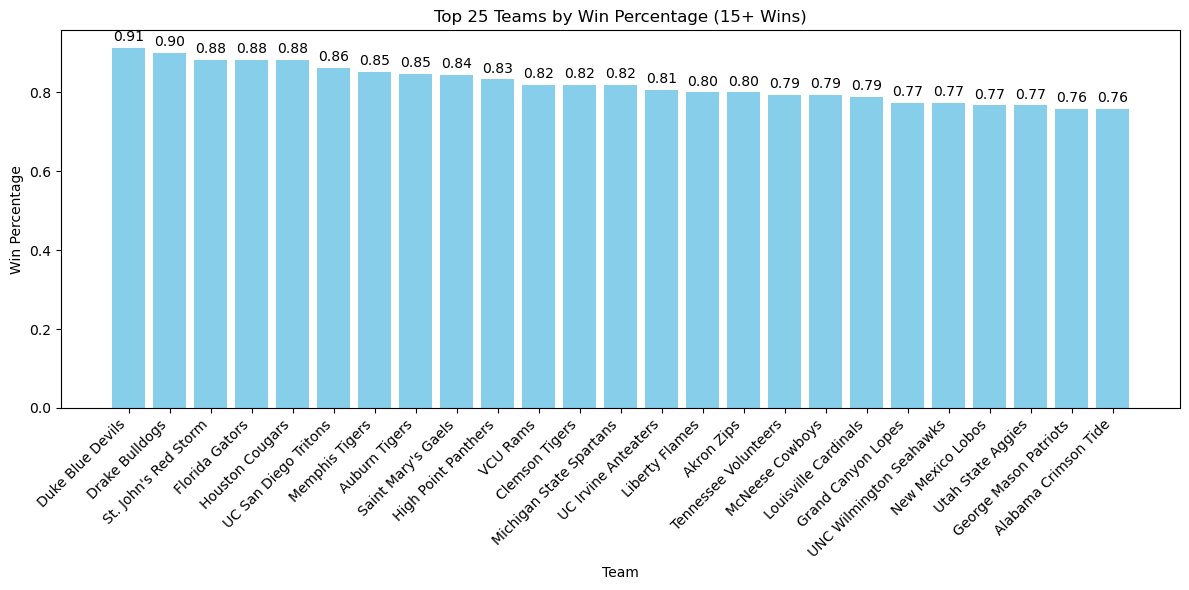

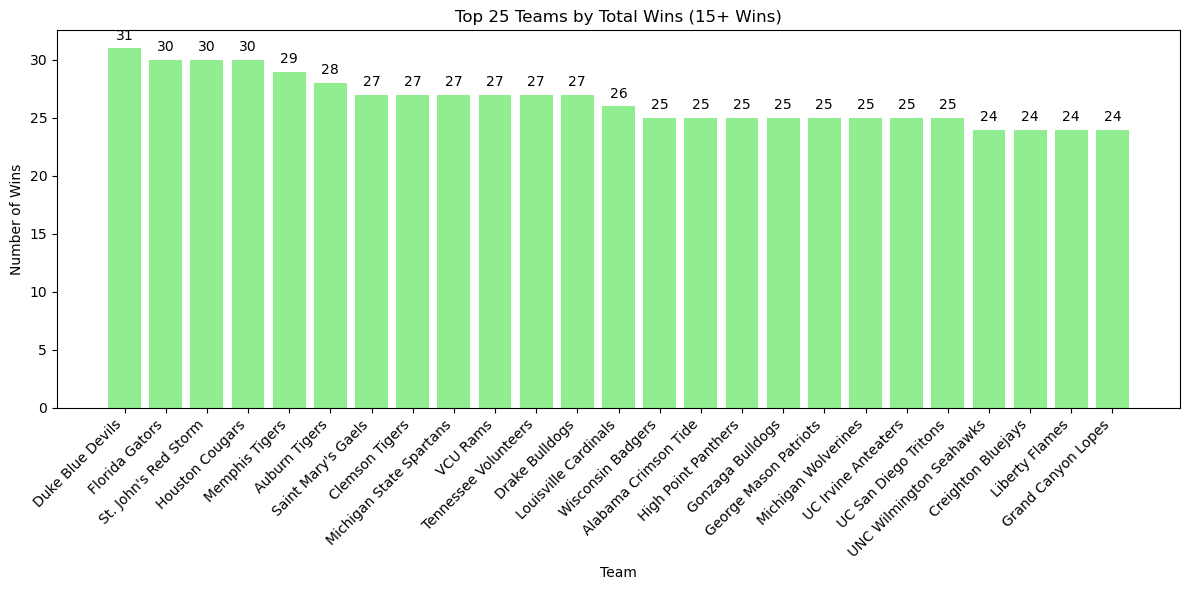

In [27]:
# Create labeled bar chart for WIN %
top_25_win_pct = team_records[team_records['WINS'] >= 15].sort_values(by='WIN %', ascending=False).head(25)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_25_win_pct['TEAM'], top_25_win_pct['WIN %'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Teams by Win Percentage (15+ Wins)')
plt.ylabel('Win Percentage')
plt.xlabel('Team')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f"{height:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Create labeled bar chart for number of wins
top_25_wins = team_records[team_records['WINS'] >= 15].sort_values(by='WINS', ascending=False).head(25)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_25_wins['TEAM'], top_25_wins['WINS'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Teams by Total Wins (15+ Wins)')
plt.ylabel('Number of Wins')
plt.xlabel('Team')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f"{height}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


## Team PPG

In [28]:
team_ppg = final_merged_df.groupby('TEAM')['F'].mean().reset_index()
team_ppg.columns = ['TEAM', 'PPG']
team_ppg['PPG'] = team_ppg['PPG'].round(2)

top_teams = team_records[team_records['WINS'] >= 15][['TEAM']]
top_ppg = pd.merge(top_teams, team_ppg, on='TEAM')
top_ppg = top_ppg.sort_values(by='PPG', ascending=False).head(25)

top_ppg.head(15)

,TEAM,PPG
1,Alabama Crimson Tide,91.12
44,Gonzaga Bulldogs,86.64
34,Florida Gators,85.41
59,Kentucky Wildcats,85.30
25,Cornell Big Red,85.07
175,Winthrop Eagles,84.68
0,Akron Zips,84.59
84,Missouri Tigers,84.45
7,Auburn Tigers,83.85
48,Illinois Fighting Illini,83.82


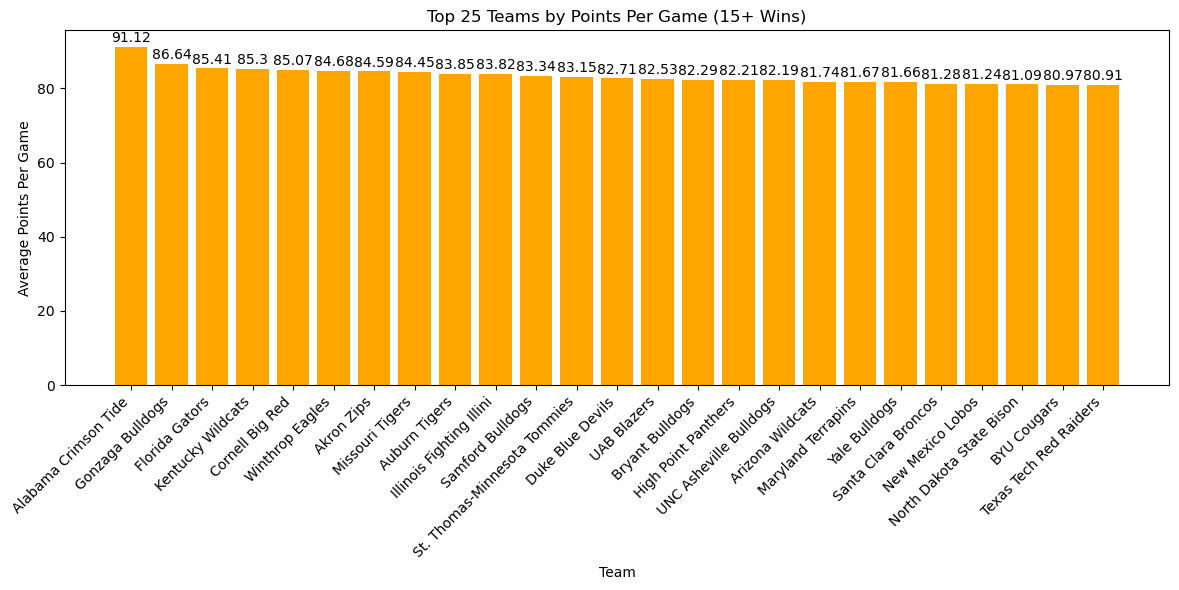

In [29]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top_ppg['TEAM'], top_ppg['PPG'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Teams by Points Per Game (15+ Wins)')
plt.ylabel('Average Points Per Game')
plt.xlabel('Team')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f"{height}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Team DEF PPG

In [30]:
team_scores = matchups[['GAME-ID_x', 'TEAM_1', 'SCORE_1']].rename(columns={'TEAM_1': 'TEAM', 'SCORE_1': 'F'})
opp_scores = matchups[['GAME-ID_x', 'TEAM_2', 'SCORE_2']].rename(columns={'TEAM_2': 'TEAM', 'SCORE_2': 'F'})
long_scores = pd.concat([team_scores, opp_scores])

opponent_scores = matchups[['GAME-ID_x', 'TEAM_1', 'SCORE_2']].rename(columns={'TEAM_1': 'TEAM', 'SCORE_2': 'OPP_PTS'})
opponent_scores_2 = matchups[['GAME-ID_x', 'TEAM_2', 'SCORE_1']].rename(columns={'TEAM_2': 'TEAM', 'SCORE_1': 'OPP_PTS'})
long_opps = pd.concat([opponent_scores, opponent_scores_2])

#defensive_df
#defensive_df = pd.merge(long_scores[['GAME-ID_x', 'TEAM']], long_opps, on=['GAME-ID_x', 'TEAM'])
def_ppg = long_opps.groupby('TEAM')['OPP_PTS'].mean().reset_index()
def_ppg.columns = ['TEAM', 'OPP_PPG']
def_ppg['OPP_PPG'] = def_ppg['OPP_PPG'].round(2)

top_def = pd.merge(top_teams, def_ppg, on='TEAM')
top_def = top_def.sort_values(by='OPP_PPG').head(25)
top_def.head(15)

,TEAM,OPP_PPG
47,Houston Cougars,58.47
29,Drake Bulldogs,59.67
95,North Texas Mean Green,60.83
123,Saint Mary's Gaels,61.38
31,Duke Blue Devils,61.91
164,VCU Rams,62.52
18,Central Connecticut Blue Devils,62.64
137,Tennessee Volunteers,63.03
38,George Mason Patriots,63.55
149,UC San Diego Tritons,63.83


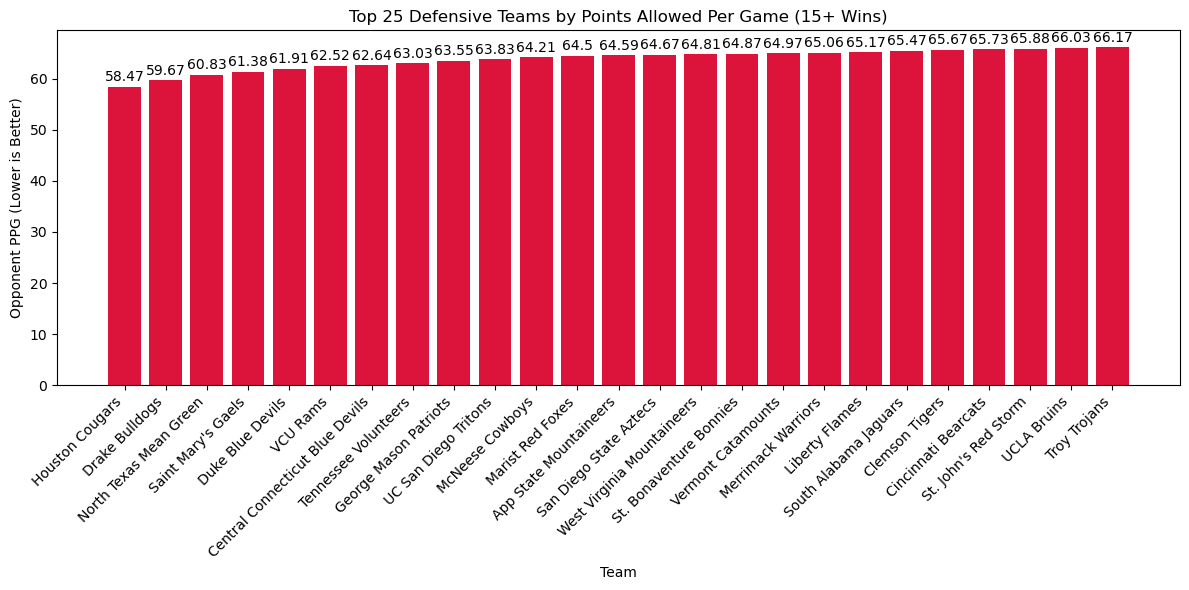

In [31]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top_def['TEAM'], top_def['OPP_PPG'], color='crimson')
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Defensive Teams by Points Allowed Per Game (15+ Wins)')
plt.ylabel('Opponent PPG (Lower is Better)')
plt.xlabel('Team')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f"{height}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Creating dataframes to explore player statistics

In [32]:
final_merged_nonavg.shape

(3692610, 91)

In [33]:
final_merged_nonavg_d1= final_merged_nonavg.dropna(subset = ['CONFERENCE'])
final_merged_nonavg_d1.shape

(3683765, 91)

In [34]:
final_merged_nonavg_d1.columns

Index(['BIGDATABALL DATASET_x', 'GAME-ID_x', 'DATE_x', 'TEAM',
       'ASSOCIATION & DIVISION', 'CONFERENCE', 'ARENA & STATE', 'VENUE', '1H',
       '2H', 'OT TOTAL', 'F', 'MIN_x', 'FG_x', 'FGA_x', '3P_x', '3PA_x',
       'FT_x', 'FTA_x', 'OR_x', 'DR_x', 'TOT_x', 'A_x', 'PF_x', 'ST_x', 'TO_x',
       'BL_x', 'PTS_x', 'POSS', 'PACE', 'OEFF', 'DEFF', 'STARTING LINEUPS',
       'UNNAMED: 33', 'UNNAMED: 34', 'UNNAMED: 35', 'UNNAMED: 36',
       'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL', 'LINE MOVEMENT #1',
       'LINE MOVEMENT #2', 'LINE MOVEMENT #3', 'CLOSING ODDS',
       'CLOSING SPREAD', 'CLOSING TOTAL', 'CLOSING MONEYLINE', 'WINS', 'LOSES',
       'WIN PERCENTAGE', 'NET SOS', 'NET NC SOS', 'QUAD 1 WINS',
       'QUAD 1 LOSSES', 'QUAD 1 WIN PERCENTAGE', 'QUAD 2 WINS',
       'QUAD 2 LOSSES', 'QUAD 2 WIN PERCENTAGE', 'QUAD 3 WINS',
       'QUAD 3 LOSSES', 'QUAD 3 WIN PERCENTAGE', 'QUAD 4 WINS',
       'QUAD 4 LOSSES', 'QUAD 4 WIN PERCENTAGE', 'AVG OPP NET',
       'BIGDATABALL 

In [35]:
final_merged_d1= final_merged_nonavg.dropna(subset = ['CONFERENCE'])
final_merged_d1.shape

(3683765, 91)

In [36]:
final_merged_d1.columns

Index(['BIGDATABALL DATASET_x', 'GAME-ID_x', 'DATE_x', 'TEAM',
       'ASSOCIATION & DIVISION', 'CONFERENCE', 'ARENA & STATE', 'VENUE', '1H',
       '2H', 'OT TOTAL', 'F', 'MIN_x', 'FG_x', 'FGA_x', '3P_x', '3PA_x',
       'FT_x', 'FTA_x', 'OR_x', 'DR_x', 'TOT_x', 'A_x', 'PF_x', 'ST_x', 'TO_x',
       'BL_x', 'PTS_x', 'POSS', 'PACE', 'OEFF', 'DEFF', 'STARTING LINEUPS',
       'UNNAMED: 33', 'UNNAMED: 34', 'UNNAMED: 35', 'UNNAMED: 36',
       'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL', 'LINE MOVEMENT #1',
       'LINE MOVEMENT #2', 'LINE MOVEMENT #3', 'CLOSING ODDS',
       'CLOSING SPREAD', 'CLOSING TOTAL', 'CLOSING MONEYLINE', 'WINS', 'LOSES',
       'WIN PERCENTAGE', 'NET SOS', 'NET NC SOS', 'QUAD 1 WINS',
       'QUAD 1 LOSSES', 'QUAD 1 WIN PERCENTAGE', 'QUAD 2 WINS',
       'QUAD 2 LOSSES', 'QUAD 2 WIN PERCENTAGE', 'QUAD 3 WINS',
       'QUAD 3 LOSSES', 'QUAD 3 WIN PERCENTAGE', 'QUAD 4 WINS',
       'QUAD 4 LOSSES', 'QUAD 4 WIN PERCENTAGE', 'AVG OPP NET',
       'BIGDATABALL 

## Teammates over 15 PPG

In [37]:
teammates_ppg = (
    final_merged_nonavg_d1.groupby(['PLAYER FULL NAME', 'TEAM'])['PTS_y']
    .sum()
    .reset_index()
    .rename(columns={'PLAYER FULL NAME': 'PLAYER', 'PTS_y': 'PLAYER TOTPTS'})
)

columns_to_merge = ['TEAM', 'WINS', 'LOSSES']

teammate_merge_ppg =  pd.merge(teammates_ppg, team_records[columns_to_merge], on='TEAM', how='inner')
teammate_merge_ppg['PLAYER TOTPTS'] = teammate_merge_ppg['PLAYER TOTPTS'] / (teammate_merge_ppg['WINS']+teammate_merge_ppg['LOSSES'])
teammate_merge_ppg['PLAYER TOTPTS'] = teammate_merge_ppg['PLAYER TOTPTS'].round(2)
teammate_merge_ppg['PLAYER PPG'] = teammate_merge_ppg['PLAYER TOTPTS'] / (teammate_merge_ppg['WINS']+teammate_merge_ppg['LOSSES'])
teammate_merge_ppg['PLAYER PPG'] = teammate_merge_ppg['PLAYER PPG'].round(2)
teammate_merge_ppg

over_15 = (teammate_merge_ppg['PLAYER PPG'] >= 15.0) & (teammate_merge_ppg['PLAYER TOTPTS'] >= 300)
over_15_tot_pts =  teammate_merge_ppg[over_15]
over_15_tot_pts
teammates_over_15_tot_pts = over_15_tot_pts[over_15_tot_pts.duplicated(subset = ['TEAM'], keep = False)]
teammates_over_15_tot_pts = teammates_over_15_tot_pts.sort_values(by = 'TEAM')
columns_to_save_pts = ['PLAYER', 'TEAM', 'PLAYER TOTPTS', 'PLAYER PPG']
teammates_over_15_tot_pts[columns_to_save_pts]

,PLAYER,TEAM,PLAYER TOTPTS,PLAYER PPG
4278,Quion Williams,Abilene Christian Wildcats,453.52,15.64
3404,Leonardo Bettiol,Abilene Christian Wildcats,462.34,15.94
4780,Tavari Johnson,Akron Zips,500.93,16.70
3963,Nate Johnson,Akron Zips,539.47,17.98
882,Chad Moodie,Alabama A&M Bulldogs,433.33,18.06
...,...,...,...,...
2750,John Poulakidas,Yale Bulldogs,517.86,18.50
3010,Juwan Maxey,Youngstown State Penguins,468.71,16.74
4022,Nico Galette,Youngstown State Penguins,528.21,18.86
4994,Ty Harper,Youngstown State Penguins,422.57,15.09


## Chart for teammates over 15 PPG

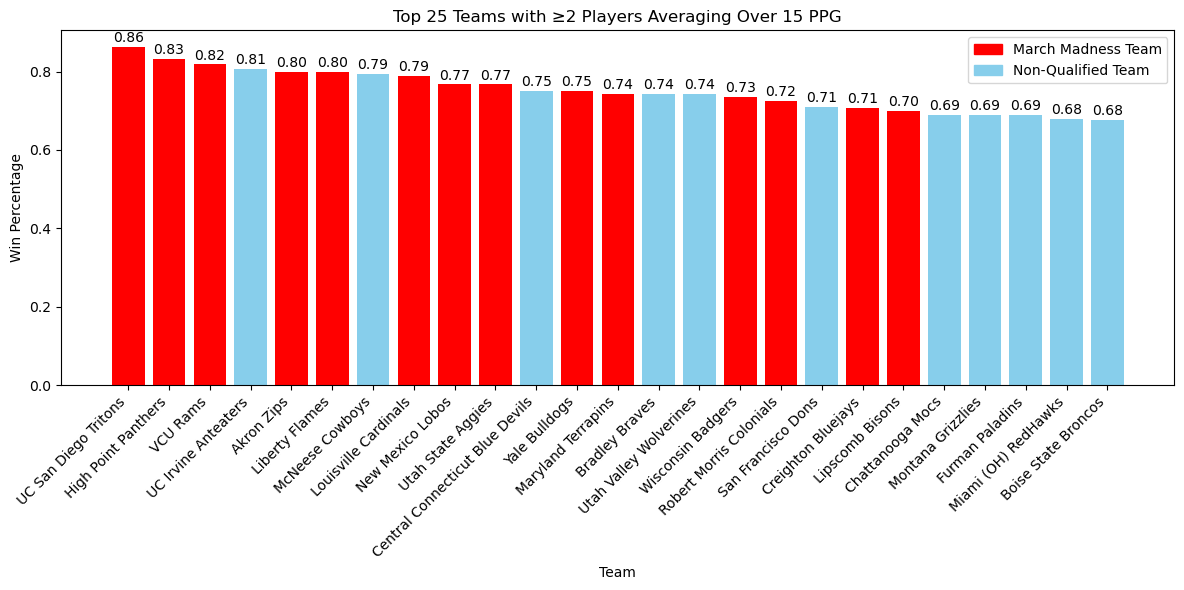

In [38]:
coulmns_x = ['TEAM']
teammates_over_15_tot_pts = teammates_over_15_tot_pts[coulmns_x].drop_duplicates(subset = ['TEAM'])

coulmns_y = ['WIN %', 'TEAM']
team_win_pct = team_records[coulmns_y]

ppg = pd.merge(teammates_over_15_tot_pts, team_win_pct, on = 'TEAM', how = 'inner')

# Drop teams with WIN % == 0
ppg = ppg[ppg['WIN %'] > 0]

ppg_descending = ppg.sort_values('WIN %', ascending = False).head(25)

# Define list of short team names to highlight
highlighted_teams = [
    'UC San Diego Tritons', 'High Point Panthers', 'VCU Rams', 'Akron Zips', 'Liberty Flames',
    'Louisville Cardinals', 'Utah State Aggies', 'New Mexico Lobos', 'Yale Bulldogs',
    'Maryland Terrapins', 'Wisconsin Badgers', 'Robert Morris Colonials',
    'Creighton Bluejays', 'Lipscomb Bisons', 'Purdue Boilermakers', 'Bryant Bulldogs'
]


# Assign colors: red if team is in highlighted list
colors = ['red' if team in highlighted_teams else 'skyblue' 
          for team in ppg_descending['TEAM']]

# Define custom legend patches
red_patch = mpatches.Patch(color='red', label='March Madness Team')
blue_patch = mpatches.Patch(color='skyblue', label='Non-Qualified Team')

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(ppg_descending['TEAM'], ppg_descending['WIN %'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Teams with ≥2 Players Averaging Over 15 PPG')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.ylabel('Win Percentage')
plt.xlabel('Team')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('teammatesppg.png')
plt.show()


## Teammates over 8 total RPG

In [39]:
teammates_tot_reb = (
    final_merged_nonavg_d1.groupby(['PLAYER FULL NAME', 'TEAM'])['TOT_y']
    .sum()
    .reset_index()
    .rename(columns={'PLAYER FULL NAME': 'PLAYER', 'TOT_y': 'PLAYER TOTREB'})
)


teammate_merge_tot_reb =  pd.merge(teammates_tot_reb, team_records[columns_to_merge], on='TEAM', how='inner')
teammate_merge_tot_reb['PLAYER TOTREB'] = teammate_merge_tot_reb['PLAYER TOTREB'] / (teammate_merge_tot_reb['WINS']+teammate_merge_tot_reb['LOSSES'])
teammate_merge_tot_reb['PLAYER TOTREB'] = teammate_merge_tot_reb['PLAYER TOTREB'].round(2)
teammate_merge_tot_reb['PLAYER RPG'] = teammate_merge_tot_reb['PLAYER TOTREB'] / (teammate_merge_tot_reb['WINS']+teammate_merge_tot_reb['LOSSES'])
teammate_merge_tot_reb['PLAYER RPG'] = teammate_merge_tot_reb['PLAYER RPG'].round(2)
teammate_merge_tot_reb

over_8 = (teammate_merge_tot_reb['PLAYER RPG'] >= 6.5) & (teammate_merge_tot_reb['PLAYER TOTREB'] >= 225)
over_8_tot_reb =  teammate_merge_tot_reb[over_8]
over_8_tot_reb
teammates_over_8_tot_reb = over_8_tot_reb[over_8_tot_reb.duplicated(subset = ['TEAM'], keep = False)]
teammates_over_8_tot_reb = teammates_over_8_tot_reb.sort_values(by = 'TEAM')
columns_to_save_reb = ['PLAYER', 'TEAM', 'PLAYER TOTREB', 'PLAYER RPG']
teammates_over_8_tot_reb[columns_to_save_reb]

,PLAYER,TEAM,PLAYER TOTREB,PLAYER RPG
1508,Doctor Bradley,Arkansas-Pine Bluff Golden Lions,342.00,342.00
4252,Quentin Bolton,Arkansas-Pine Bluff Golden Lions,242.00,242.00
1624,Earl Timberlake,Bryant Bulldogs,279.44,8.73
417,Barry Evans,Bryant Bulldogs,233.75,7.30
3209,Keyshawn Mitchell,Bryant Bulldogs,247.56,7.74
...,...,...,...,...
1912,Greg Gantt Jr.,UNC Asheville Bulldogs,241.23,9.28
1148,Corey Washington,Wichita State Shockers,252.66,7.90
4265,Quincy Ballard,Wichita State Shockers,295.97,9.25
4022,Nico Galette,Youngstown State Penguins,302.36,10.80


## Chart for Teammates over 8 total RPG

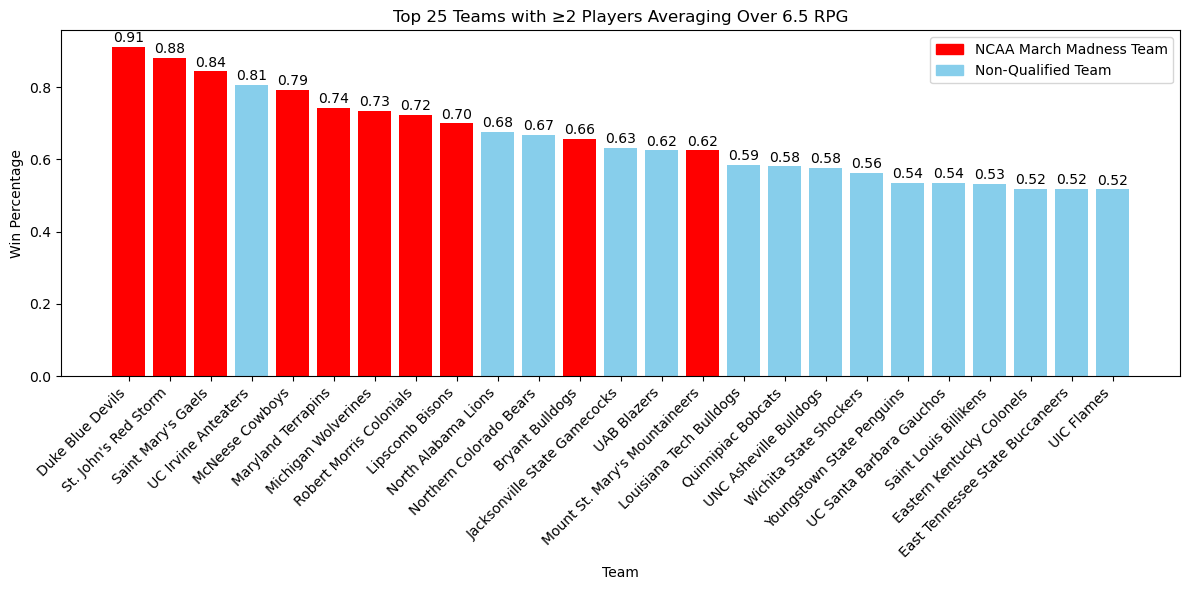

In [40]:
# Define list of full team names
highlighted_teams = [
    'Maryland Terrapins', 'Robert Morris Colonials', 'Lipscomb Bisons', 'Bryant Bulldogs',
    'Duke Blue Devils', 'St. John\'s Red Storm', 'Saint Mary\'s Gaels', 'McNeese Cowboys',
    'Michigan Wolverines', 'Mount St. Mary\'s Mountaineers'
]

# Limit to unique teams
teammates_over_8_tot_reb = teammates_over_8_tot_reb[coulmns_x].drop_duplicates(subset=['TEAM'])

# Merge and sort
tot_reb = pd.merge(teammates_over_8_tot_reb, team_win_pct, on='TEAM', how='inner')
tot_reb_descending = tot_reb.sort_values('WIN %', ascending=False).head(25)  

# Assign colors based on team presence in highlight list
colors = ['red' if team in highlighted_teams else 'skyblue' for team in tot_reb_descending['TEAM']]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tot_reb_descending['TEAM'], tot_reb_descending['WIN %'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Teams with ≥2 Players Averaging Over 6.5 RPG')
plt.ylabel('Win Percentage')
plt.xlabel('Team')

# Bar labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f"{height:.2f}", ha='center', va='bottom')

# Legend
red_patch = mpatches.Patch(color='red', label='NCAA March Madness Team')
blue_patch = mpatches.Patch(color='skyblue', label='Non-Qualified Team')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

plt.tight_layout()
plt.savefig('teammatesreb.png')
plt.show()


## Teammates over .50 field goal percentage

In [41]:
teammates_field_goals = (
    final_merged_nonavg_d1.groupby(['PLAYER FULL NAME', 'TEAM'])[['FG_y', 'FGA_y']]
    .sum()
    .reset_index()
    .rename(columns={'PLAYER FULL NAME': 'PLAYER', 'FG_y': 'PLAYER FG', 'FGA_y': 'PLAYER FGA'})
)

teammate_merge =  pd.merge(teammates_field_goals, team_records[columns_to_merge], on='TEAM', how='inner')
teammate_merge


teammate_merge['PLAYER FG'] = teammate_merge['PLAYER FG'] / (teammate_merge['WINS']+teammate_merge['LOSSES'])
teammate_merge['PLAYER FGA'] = teammate_merge['PLAYER FGA'] / (teammate_merge['WINS']+teammate_merge['LOSSES'])
teammate_merge['PLAYER FG PRCT'] = teammate_merge['PLAYER FG'] / teammate_merge['PLAYER FGA']
teammate_merge['PLAYER FG PRCT'] = teammate_merge['PLAYER FG PRCT'].round(2)


over_50 = (teammate_merge['PLAYER FG PRCT'] >= .53) & (teammate_merge['PLAYER FGA'] >= 200)
over_50_fg_prct =  teammate_merge[over_50]
over_50_fg_prct
teammates_over_50_fg_prct = over_50_fg_prct[over_50_fg_prct.duplicated(subset = ['TEAM'], keep = False)]
teammates_over_50_fg_prct = teammates_over_50_fg_prct.sort_values(by = 'TEAM')
columns_to_save_fg = ['PLAYER', 'TEAM', 'PLAYER FG PRCT']
teammates_over_50_fg_prct[columns_to_save_fg]

,PLAYER,TEAM,PLAYER FG PRCT
5271,Zavian McLean,Florida Gulf Coast Eagles,0.54
3139,Keeshawn Kellman,Florida Gulf Coast Eagles,0.60
1887,Graham Ike,Gonzaga Bulldogs,0.60
538,Braden Huff,Gonzaga Bulldogs,0.57
4120,Oumar Ballo,Indiana Hoosiers,0.62
3576,Malik Reneau,Indiana Hoosiers,0.55
3021,KJ Adams Jr.,Kansas Jayhawks,0.54
1990,Hunter Dickinson,Kansas Jayhawks,0.53
220,Amari Williams,Kentucky Wildcats,0.58
256,Andrew Carr,Kentucky Wildcats,0.55


## Teams with at least two players averaging over 50% Field Goal percentage

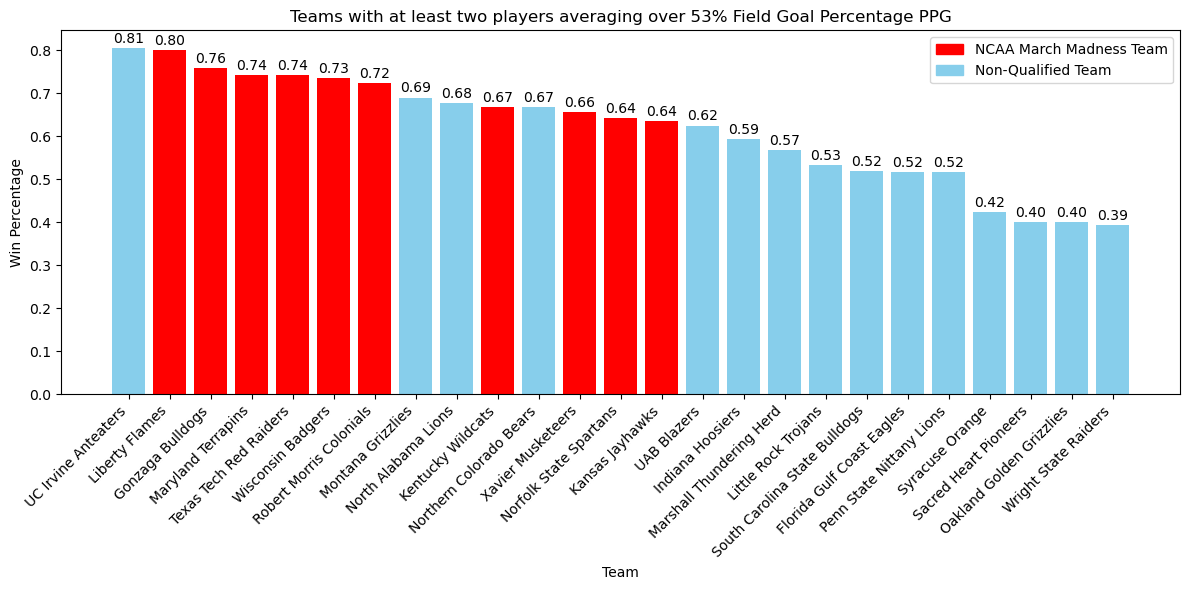

In [42]:
# Define list of full team names
highlighted_teams = [
    'Liberty Flames', 'Gonzaga Bulldogs', 'Maryland Terrapins', 'Texas Tech Red Raiders',
    'Wisconsin Badgers', 'Robert Morris Colonials', 'Xavier Musketeers', 'Kentucky Wildcats',
    'Kansas Jayhawks', 'Norfolk State Spartans'
]

teammates_over_50_fg_prct =teammates_over_50_fg_prct[coulmns_x].drop_duplicates(subset = ['TEAM'])

two_over_50 = pd.merge(teammates_over_50_fg_prct, team_win_pct, on='TEAM', how='inner')
two_over_50_descending = two_over_50.sort_values('WIN %', ascending=False).head(25)

colors = ['red' if team in highlighted_teams else 'skyblue' for team in two_over_50_descending['TEAM']]

plt.figure(figsize=(12, 6))
bars = plt.bar(two_over_50_descending['TEAM'], two_over_50_descending['WIN %'], color= colors)
plt.xticks(rotation=45, ha='right')
plt.title('Teams with at least two players averaging over 53% Field Goal Percentage PPG')
plt.ylabel('Win Percentage')
plt.xlabel('Team')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f"{height:.2f}", ha='center', va='bottom')

red_patch = mpatches.Patch(color='red', label='NCAA March Madness Team')
blue_patch = mpatches.Patch(color='skyblue', label='Non-Qualified Team')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

plt.tight_layout()
plt.savefig('teammatesFG.png')
plt.show()

## Teammates 3P% over 40

In [43]:
# === Calculate 3P percentages per player ===
teammates_3P = (
    final_merged_nonavg_d1.groupby(['PLAYER FULL NAME', 'TEAM'])[['3P_y', '3PA_y']]
    .sum()
    .reset_index()
    .rename(columns={'PLAYER FULL NAME': 'PLAYER', '3P_y': 'PLAYER 3P', '3PA_y': 'PLAYER 3PA'})
)

# No need to merge with WINS/LOSSES if not normalizing per game
# Only keep team for later team-level filtering
teammate_merge_3P = teammates_3P.copy()

# Calculate 3P%
teammate_merge_3P['PLAYER 3P PRCT'] = (
    teammate_merge_3P['PLAYER 3P'] / teammate_merge_3P['PLAYER 3PA']
).round(2)

# Filter players with ≥43% 3P and ≥50 3PA
over_40 = (teammate_merge_3P['PLAYER 3P PRCT'] >= 0.43) & (teammate_merge_3P['PLAYER 3PA'] >= 50)
over_40_3p_prct = teammate_merge_3P[over_40]

# Get teams with at least 2 qualifying players
teammates_over_40_3p_prct = over_40_3p_prct[
    over_40_3p_prct.duplicated(subset=['TEAM'], keep=False)
]

# View or export
teammates_over_40_3p_prct


,PLAYER,TEAM,PLAYER 3P,PLAYER 3PA,PLAYER 3P PRCT
2,A.J. Wills,Wyoming Cowboys,736,1728,0.43
45,Aaron Oh,Georgia State Panthers,33,66,0.50
61,Abou Ousmane,Oklahoma State Cowboys,512,1184,0.43
76,Adam Holod,American University Eagles,34,68,0.50
77,Adam Miller,Arizona State Sun Devils,1792,4032,0.44
...,...,...,...,...,...
5126,Vianney Salatchoum,Florida International Panthers,132,297,0.44
5134,Viktor Rajkovic,Seattle U Redhawks,288,672,0.43
5167,Wesley Yates III,USC Trojans,1782,4059,0.44
5213,Wilson Dubinsky,South Carolina State Bulldogs,1947,4356,0.45


## Teams with at least two players averaging over 30% 3P Percentage PPG

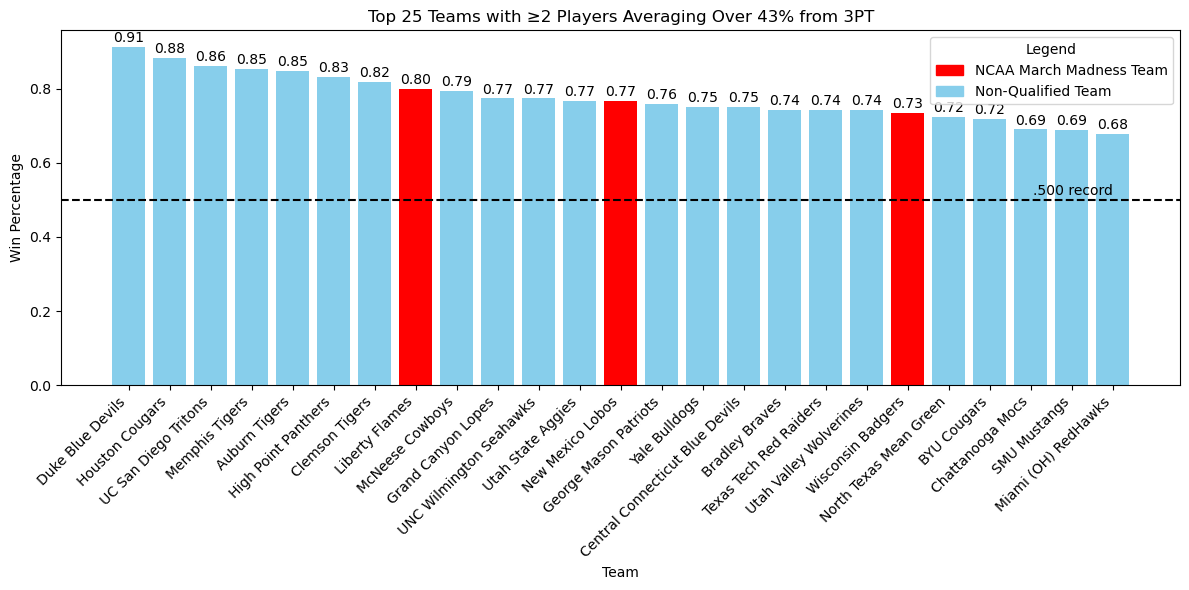

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Step 1: Merge with team win percentage
team_3P_pct = teammates_over_40_3p_prct[['TEAM']].drop_duplicates()
team_3P_pct = pd.merge(team_3P_pct, team_records, on='TEAM', how='inner')  # ← assuming team_win_pct is correct

# Step 2: Filter out teams with 0% win
team_3P_pct = team_3P_pct[team_3P_pct['WIN %'] > 0]

# Step 3: Sort by win % and take top 25
two_over_40_descending = team_3P_pct.sort_values('WIN %', ascending=False).head(25)

# Step 4: Define March Madness teams (full names from `TEAM` column)
highlighted_teams = [
    'Liberty Flames', 'New Mexico Lobos', 'Kentucky Wildcats', 'Oklahoma Sooners',
    'Gonzaga Bulldogs', 'Texas Longhorns', 'Iowa State Cyclones', 'Wisconsin Badgers', 'Robert Morris Colonials'
]

# Step 5: Assign bar colors
colors = ['red' if team in highlighted_teams else 'skyblue' for team in two_over_40_descending['TEAM']]

# Step 6: Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(two_over_40_descending['TEAM'], two_over_40_descending['WIN %'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Teams with ≥2 Players Averaging Over 43% from 3PT')
plt.ylabel('Win Percentage')
plt.xlabel('Team')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f"{height:.2f}", ha='center', va='bottom')

# Add dashed .500 win line
plt.axhline(y=0.5, color='black', linestyle='--')
plt.text(len(two_over_40_descending) - 1, 0.505, '.500 record', color='black', ha='right', va='bottom')

# Add legend
red_patch = mpatches.Patch(color='red', label='NCAA March Madness Team')
blue_patch = mpatches.Patch(color='skyblue', label='Non-Qualified Team')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', title='Legend')

plt.tight_layout()
plt.savefig('teammates3P.png')
plt.show()


## Top 25 Teams with ≥2 Players Averaging Over 43% from 3PT

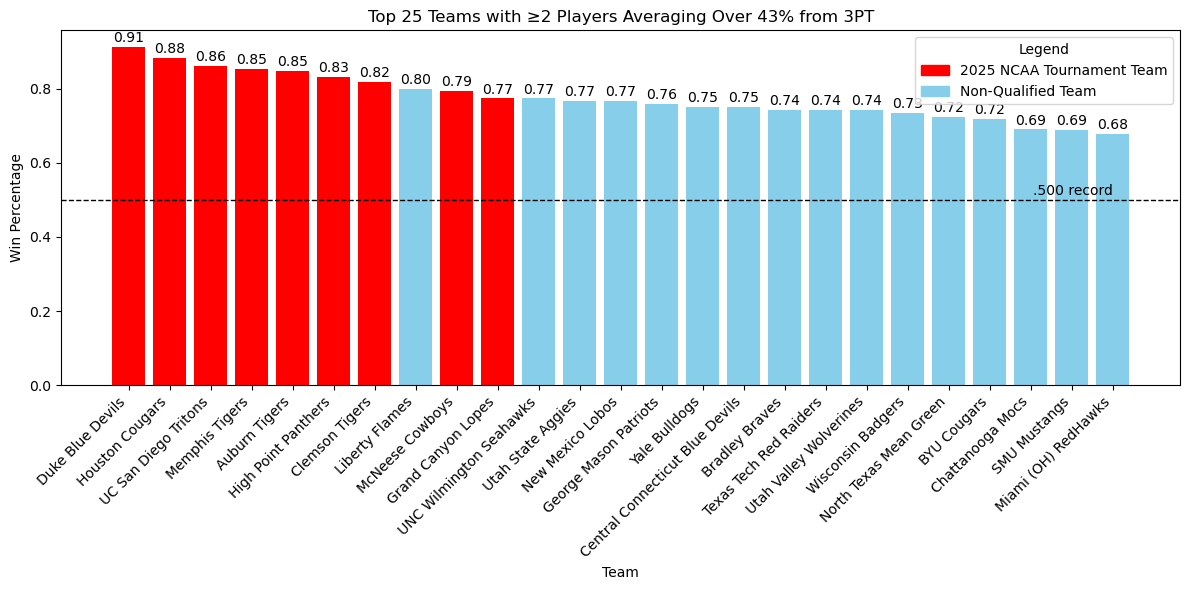

In [45]:
# Remove teams with 0.0 win percentage
two_over_40 = pd.merge(
    teammates_over_40_3p_prct[coulmns_x].drop_duplicates(subset=['TEAM']),
    team_win_pct,
    on='TEAM',
    how='inner'
)
two_over_40 = two_over_40[two_over_40['WIN %'] > 0]

# Sort by win percentage and keep top 25
two_over_40_descending = two_over_40.sort_values('WIN %', ascending=False).head(25)

# Bar colors: start with all red (non-tournament), then turn specific bars green
bar_colors = ['skyblue'] * len(two_over_40_descending)

# Tournament team indexes (zero-based from sorted DataFrame)
tournament_teams = [0, 1, 2, 3, 4, 5, 6, 8, 9] 
for idx in tournament_teams:
    if idx < len(bar_colors):
        bar_colors[idx] = 'red'

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(two_over_40_descending['TEAM'], two_over_40_descending['WIN %'], color=bar_colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Teams with ≥2 Players Averaging Over 43% from 3PT')
plt.ylabel('Win Percentage')
plt.xlabel('Team')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f"{height:.2f}", ha='center', va='bottom')

# Add dashed line for .500 record
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.text(len(two_over_40_descending)-1, 0.505, '.500 record', color='black', ha='right', va='bottom')

# Legend
green_patch = mpatches.Patch(color='red', label='2025 NCAA Tournament Team')
red_patch = mpatches.Patch(color='skyblue', label='Non-Qualified Team')
plt.legend(handles=[green_patch, red_patch], loc='upper right', title='Legend')

plt.tight_layout()
plt.savefig('teammates3P_43percent.png')
plt.show()


## Teammates FT over 80 pct

In [46]:
teammates_FT= (
    final_merged_nonavg_d1.groupby(['PLAYER FULL NAME', 'TEAM'])[['FT_y', 'FTA_y']]
    .sum()
    .reset_index()
    .rename(columns={'PLAYER FULL NAME': 'PLAYER', 'FT_y': 'PLAYER FT', 'FTA_y': 'PLAYER FTA'})
)

teammate_merge_FT =  pd.merge(teammates_FT, team_records[columns_to_merge], on='TEAM', how='inner')
teammate_merge_FT


teammate_merge_FT['PLAYER FT'] = teammate_merge_FT['PLAYER FT'] / (teammate_merge_FT['WINS']+teammate_merge_FT['LOSSES'])
teammate_merge_FT['PLAYER FTA'] = teammate_merge_FT['PLAYER FTA'] / (teammate_merge_FT['WINS']+teammate_merge_FT['LOSSES'])
teammate_merge_FT['PLAYER FT PRCT'] = teammate_merge_FT['PLAYER FT'] / teammate_merge_FT['PLAYER FTA']
teammate_merge_FT['PLAYER FT PRCT'] = teammate_merge_FT['PLAYER FT PRCT'].round(2)


over_80 = (teammate_merge_FT['PLAYER FT PRCT'] >= .78) & (teammate_merge_FT['PLAYER FTA'] >= 125)
over_80_ft_prct =  teammate_merge_FT[over_80]
over_80_ft_prct
teammates_over_80_ft_prct = over_80_ft_prct[over_80_ft_prct.duplicated(subset = ['TEAM'], keep = False)]
teammates_over_80_ft_prct = teammates_over_80_ft_prct.sort_values(by = 'TEAM')
columns_to_save = ['PLAYER', 'TEAM', 'PLAYER FT PRCT']
teammates_over_80_ft_prct[columns_to_save]

,PLAYER,TEAM,PLAYER FT PRCT
2405,Jalyke Gaines-Wyatt,Alcorn State Braves,0.78
3610,Marcus Tankersley,Alcorn State Braves,0.80
264,Andrew Meadow,Boise State Broncos,0.84
5071,Tyson Degenhart,Boise State Broncos,0.80
713,CJ Hardy,Cal State Bakersfield Roadrunners,0.79
...,...,...,...
817,Cameron Hildreth,Wake Forest Demon Deacons,0.81
2736,John Blackwell,Wisconsin Badgers,0.81
2754,John Tonje,Wisconsin Badgers,0.91
3010,Juwan Maxey,Youngstown State Penguins,0.78


## Teams with at least two players averaging over 80% Field Throw Percentage PPG

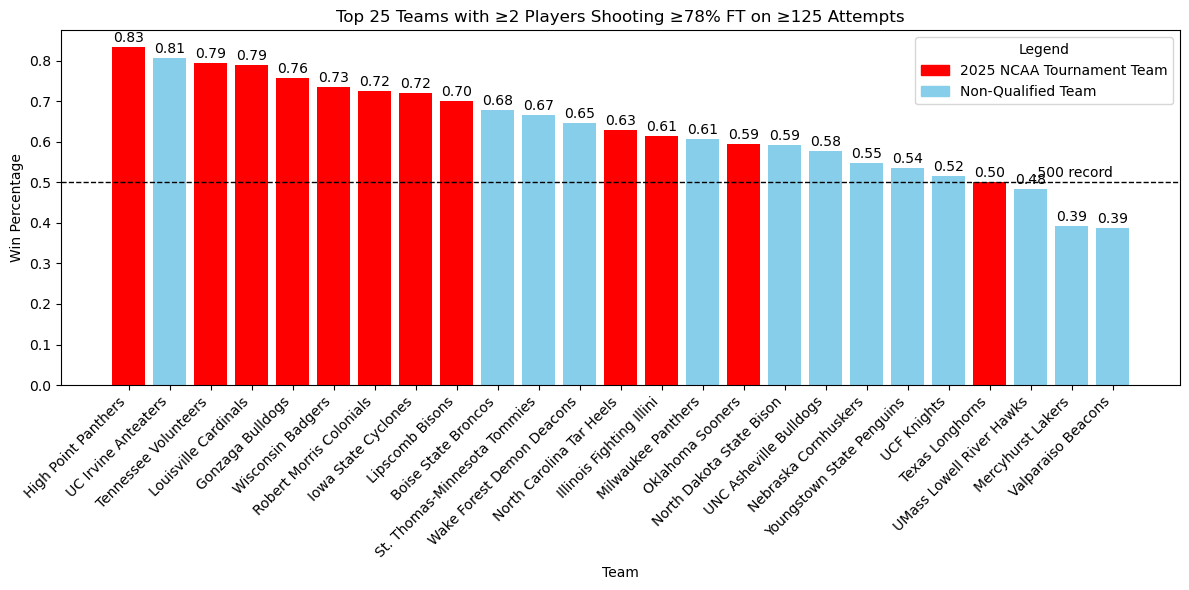

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Drop duplicates
teammates_over_80_ft_prct = teammates_over_80_ft_prct[['TEAM']].drop_duplicates(subset=['TEAM'])

# Merge with win %
team_ft_pct = pd.merge(teammates_over_80_ft_prct, team_win_pct, on='TEAM', how='inner')

# Remove teams with 0% win
team_ft_pct = team_ft_pct[team_ft_pct['WIN %'] > 0]

# Sort and get top 25
team_ft_pct_top = team_ft_pct.sort_values('WIN %', ascending=False).head(25)

# Define NCAA tournament teams (full names from your TEAM column)
highlighted_teams = [
    'Gonzaga Bulldogs', 'Tennessee Volunteers',
    'Wisconsin Badgers', 'Louisville Cardinals',
    'Robert Morris Colonials', 'North Carolina Tar Heels',
    'Iowa State Cyclones', 'Illinois Fighting Illini',
    'Lipscomb Bisons', 'Oklahoma Sooners',
    'Texas Longhorns', 'High Point Panthers'
]


# Assign colors
colors = ['red' if team in highlighted_teams else 'skyblue' for team in team_ft_pct_top['TEAM']]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(team_ft_pct_top['TEAM'], team_ft_pct_top['WIN %'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Teams with ≥2 Players Shooting ≥78% FT on ≥125 Attempts')
plt.ylabel('Win Percentage')
plt.xlabel('Team')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.005, f"{height:.2f}", ha='center', va='bottom')

# .500 dashed line
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.text(len(team_ft_pct_top) - 1, 0.505, '.500 record', color='black', ha='right', va='bottom')

# Legend
green_patch = mpatches.Patch(color='red', label='2025 NCAA Tournament Team')
red_patch = mpatches.Patch(color='skyblue', label='Non-Qualified Team')
plt.legend(handles=[green_patch, red_patch], loc='upper right', title='Legend')

plt.tight_layout()
plt.savefig('teammatesFT.png')
plt.show()


## Opp Net Avg

In [48]:
lowest_opp_net_avg = (final_merged_d1.groupby(['TEAM', 'QUAD 1 WIN PERCENTAGE', 'QUAD 2 WIN PERCENTAGE', 'QUAD 3 WIN PERCENTAGE', 'QUAD 4 WIN PERCENTAGE'])['AVG OPP NET'].mean().reset_index())
lowest_opp_net_avg = lowest_opp_net_avg.sort_values(by = 'AVG OPP NET')
ten_lowest_opp_netavg_teams = lowest_opp_net_avg[:20]
ten_lowest_opp_netavg_teams = ten_lowest_opp_netavg_teams.drop(ten_lowest_opp_netavg_teams.columns[5], axis = 1)
ten_lowest_opp_netavg_teams
# columns_to_keep = ['TEAM', 'QUAD 1 WIN PERCENTAGE', 'QUAD 2 WIN PERCENTAGE', 'QUAD 3 WIN PERCENTAGE', 'QUAD 4 WIN PERCENTAGE']
# ten_lowest_opp_netavg_teams2 = ten_lowest_opp_netavg_teams[columns_to_keep]
# ten_lowest_opp_netavg_teams2

,TEAM,QUAD 1 WIN PERCENTAGE,QUAD 2 WIN PERCENTAGE,QUAD 3 WIN PERCENTAGE,QUAD 4 WIN PERCENTAGE
4,Alabama Crimson Tide,0.578947,1.000000,1.000000,1.0
15,Auburn Tigers,0.761905,1.000000,1.000000,1.0
236,Purdue Boilermakers,0.411800,0.900000,1.000000,1.0
129,Kansas Jayhawks,0.352941,0.875000,1.000000,1.0
169,Michigan Wolverines,0.631579,0.666667,1.000000,1.0
9,Arizona State Sun Devils,0.222222,0.428571,0.666667,1.0
294,Texas A&M Aggies,0.437500,0.900000,1.000000,1.0
133,Kentucky Wildcats,0.523810,0.500000,1.000000,1.0
19,Baylor Bears,0.294118,0.875000,0.500000,1.0
10,Arizona Wildcats,0.476190,0.800000,1.000000,1.0


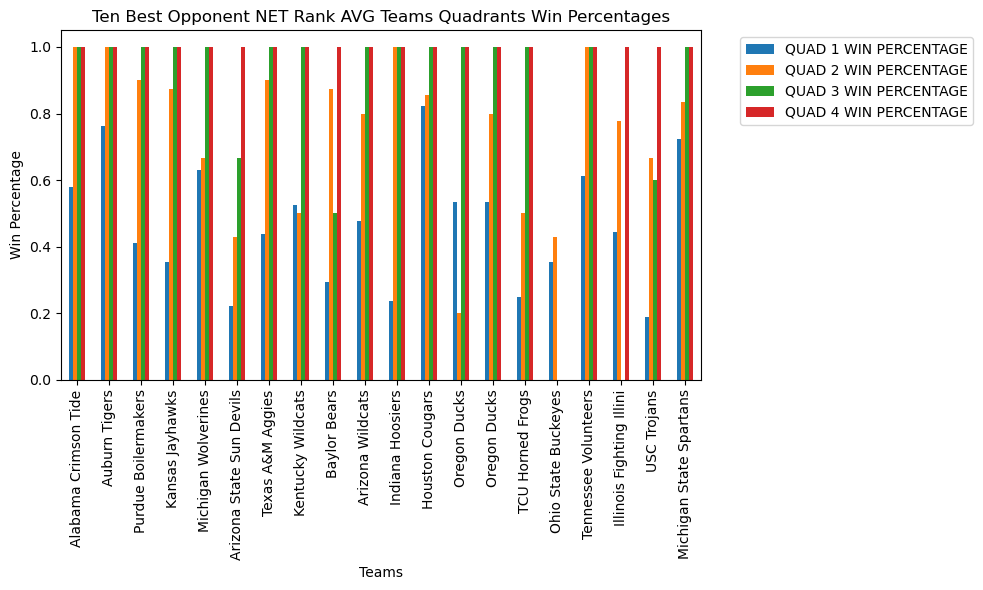

In [49]:
ten_lowest_opp_netavg_teams = ten_lowest_opp_netavg_teams.set_index('TEAM')
ax = ten_lowest_opp_netavg_teams.plot(kind = 'bar', figsize = (10,6))
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.title('Ten Best Opponent NET Rank AVG Teams Quadrants Win Percentages')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Inferential Statistics

In [50]:
# Rename 'AVG OPP NET' to 'NET RANK' for ranking comparison
team_net_df['NET SOS'] = team_net_df['AVG OPP NET']

# Sort teams by NET and split into top/bottom quartiles
team_stats_sorted = team_net_df.sort_values('NET SOS')
quartile_size = len(team_stats_sorted) // 4
top_teams = team_stats_sorted.head(quartile_size)
bottom_teams = team_stats_sorted.tail(quartile_size)

# Define quadrant win percentage columns
quad_cols = [
    "QUAD 1 WIN PERCENTAGE",
    "QUAD 2 WIN PERCENTAGE",
    "QUAD 3 WIN PERCENTAGE",
    "QUAD 4 WIN PERCENTAGE"
]

# Run t-tests and store results
ttest_results = {}
for col in quad_cols:
    stat, pval = ttest_ind(top_teams[col].dropna(), bottom_teams[col].dropna())
    ttest_results[col] = {'t-statistic': round(stat, 2), 'p-value': pval}

# Display results in readable format
print("T-Test Results: Top vs Bottom Quartile NET-Ranked Teams\n")
for quad, result in ttest_results.items():
    print(f"{quad}: t = {result['t-statistic']}, p = {result['p-value']:.4e}")


T-Test Results: Top vs Bottom Quartile NET-Ranked Teams

QUAD 1 WIN PERCENTAGE: t = 79.48, p = 0.0000e+00
QUAD 2 WIN PERCENTAGE: t = 50.03, p = 0.0000e+00
QUAD 3 WIN PERCENTAGE: t = 88.05, p = 0.0000e+00
QUAD 4 WIN PERCENTAGE: t = 92.84, p = 0.0000e+00


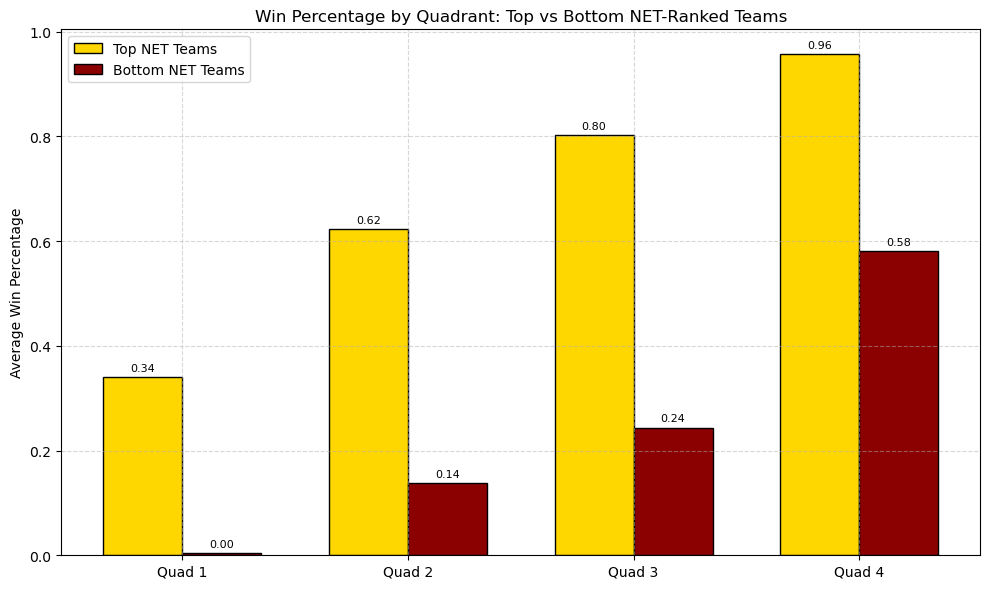

In [51]:
# Prepare data for grouped bar chart
quad_labels = ["Quad 1", "Quad 2", "Quad 3", "Quad 4"]
quad_cols = [
    "QUAD 1 WIN PERCENTAGE",
    "QUAD 2 WIN PERCENTAGE",
    "QUAD 3 WIN PERCENTAGE",
    "QUAD 4 WIN PERCENTAGE"
]

# Calculate average win percentages
top_means = [top_teams[col].mean() for col in quad_cols]
bottom_means = [bottom_teams[col].mean() for col in quad_cols]

# Bar chart setup
x = np.arange(len(quad_labels))  # Label locations
width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, top_means, width, label='Top NET Teams', color='gold', edgecolor='black')
bars2 = ax.bar(x + width/2, bottom_means, width, label='Bottom NET Teams', color='darkred', edgecolor='black')

# Axis labels and title
ax.set_ylabel('Average Win Percentage')
ax.set_title('Win Percentage by Quadrant: Top vs Bottom NET-Ranked Teams')
ax.set_xticks(x)
ax.set_xticklabels(quad_labels)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Annotate bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Kmeans Cluster

In [52]:
# Select relevant features
features = team_net_df[['AVG OPP NET', 'QUAD 1 WIN PERCENTAGE', 'NET SOS']]

# Drop rows with missing values
features_clean = features.dropna()

# Standardize features
scaled = StandardScaler().fit_transform(features_clean)

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(scaled)

# Assign clusters to noNaDataFrame
clustered_df = features_clean.copy()
clustered_df['Cluster'] = kmeans.labels_



In [53]:
# PCA for visualization
from sklearn.decomposition import PCA

# Drop to 2 PC
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Add PCA to clustered df
clustered_df['PCA1'] = pca_result[:, 0]
clustered_df['PCA2'] = pca_result[:, 1]


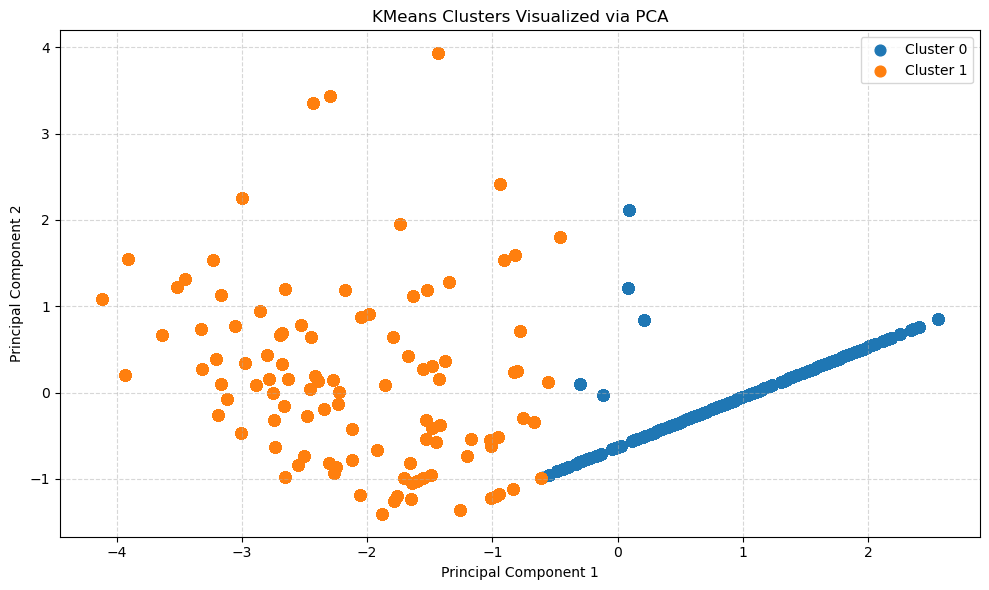

In [54]:
# Plot KMeans
plt.figure(figsize=(10, 6))

for cluster_id in clustered_df['Cluster'].unique():
    cluster_points = clustered_df[clustered_df['Cluster'] == cluster_id]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'],
                label=f'Cluster {cluster_id}', s=60)

plt.title('KMeans Clusters Visualized via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


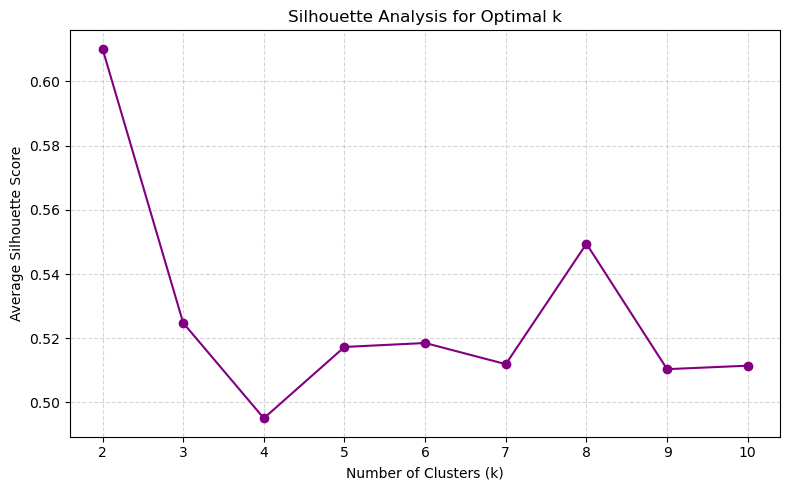

In [55]:
# Make sure k was optimal
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use the same cleaned features as before
features = team_net_df[['AVG OPP NET', 'QUAD 1 WIN PERCENTAGE', 'NET SOS']]
features_clean = features.dropna()
scaled = StandardScaler().fit_transform(features_clean)

# Try different values of k
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled)
    score = silhouette_score(scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='purple')
plt.xticks(k_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [56]:
import sys
!{sys.executable} -m pip install xgboost
# conda install -c conda-forge xgboost
# pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

'C:\Users\Richard' is not recognized as an internal or external command,
operable program or batch file.


# Training Extreme Gradient Boosting (XGBoost)

## Renaming Colomns to Simplify

In [57]:
column_rename_map = {
    'WIN PERCENTAGE': 'WIN_PCT',
    'QUAD 1 WIN PERCENTAGE': 'QUAD_1_PCT',
    'QUAD 2 WIN PERCENTAGE': 'QUAD_2_PCT',
    'QUAD 3 WIN PERCENTAGE': 'QUAD_3_PCT',
    'QUAD 4 WIN PERCENTAGE': 'QUAD_4_PCT',
    'NET SOS': 'NET_SOS',
    'NET NC SOS': 'NET_NC_SOS',
    'AVG OPP NET': 'AVG_OPP_NET',
    'F': 'SCORE'
}
final_merged_df = final_merged_df.rename(columns=column_rename_map)


In [58]:
# Confirming Columns in dataset
print(final_merged_df.columns.tolist())


['BIGDATABALL DATASET', 'GAME-ID_x', 'DATE', 'TEAM', 'ASSOCIATION & DIVISION', 'CONFERENCE', 'ARENA & STATE', 'VENUE', '1H', '2H', 'OT TOTAL', 'SCORE', 'MIN_x', 'FG_x', 'FGA_x', '3P_x', '3PA_x', 'FT_x', 'FTA_x', 'OR_x', 'DR_x', 'TOT_x', 'A_x', 'PF_x', 'ST_x', 'TO_x', 'BL_x', 'PTS_x', 'POSS', 'PACE', 'OEFF', 'DEFF', 'STARTING LINEUPS', 'UNNAMED: 33', 'UNNAMED: 34', 'UNNAMED: 35', 'UNNAMED: 36', 'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL', 'LINE MOVEMENT #1', 'LINE MOVEMENT #2', 'LINE MOVEMENT #3', 'CLOSING ODDS', 'CLOSING SPREAD', 'CLOSING TOTAL', 'CLOSING MONEYLINE', 'WINS', 'LOSES', 'WIN_PCT', 'NET_SOS', 'NET_NC_SOS', 'QUAD 1 WINS', 'QUAD 1 LOSSES', 'QUAD_1_PCT', 'QUAD 2 WINS', 'QUAD 2 LOSSES', 'QUAD_2_PCT', 'QUAD 3 WINS', 'QUAD 3 LOSSES', 'QUAD_3_PCT', 'QUAD 4 WINS', 'QUAD 4 LOSSES', 'QUAD_4_PCT', 'AVG_OPP_NET', 'GAME-ID_y', 'MIN_y', 'FG_y', 'FGA_y', '3P_y', '3PA_y', 'FT_y', 'FTA_y', 'OR_y', 'DR_y', 'TOT_y', 'A_y', 'PF_y', 'ST_y', 'TO_y', 'BL_y', 'PTS_y', 'USAGE RATE (%)']


In [59]:
# Teams for each Region:
# Build structured dictionary for all regions using the teams provided from the image

regions_data = {
    "South": [
        ("1", "Auburn"), ("16", "Alabama St."),
        ("8", "Louisville"), ("9", "Creighton"),
        ("5", "Michigan"), ("12", "UC San Diego"),
        ("4", "Texas A&M"), ("13", "Yale"),
        ("6", "Ole Miss"), ("11", "North Carolina"),
        ("3", "Iowa St."), ("14", "Lipscomb"),
        ("7", "Marquette"), ("10", "New Mexico"),
        ("2", "Michigan St."), ("15", "Bryant")
    ],
    "West": [
        ("1", "Florida"), ("16", "Norfolk St."),
        ("8", "UConn"), ("9", "Oklahoma"),
        ("5", "Memphis"), ("12", "Colorado St."),
        ("4", "Maryland"), ("13", "Grand Canyon"),
        ("6", "Missouri"), ("11", "Drake"),
        ("3", "Texas Tech"), ("14", "UNCW"),
        ("7", "Kansas"), ("10", "Arkansas"),
        ("2", "St. John's"), ("15", "Omaha")
    ],
    "East": [
        ("1", "Duke"), ("16", "Mount St. Mary's"),
        ("8", "Mississippi St."), ("9", "Baylor"),
        ("5", "Oregon"), ("12", "Liberty"),
        ("4", "Arizona"), ("13", "Akron"),
        ("6", "BYU"), ("11", "VCU"),
        ("3", "Wisconsin"), ("14", "Montana"),
        ("7", "Saint Mary's"), ("10", "Vanderbilt"),
        ("2", "Alabama"), ("15", "Robert Morris")
    ],
    "Midwest": [
        ("1", "Houston"), ("16", "SIU Edwardsville"),
        ("8", "Gonzaga"), ("9", "Georgia"),
        ("5", "Clemson"), ("12", "McNeese"),
        ("4", "Purdue"), ("13", "High Point"),
        ("6", "Illinois"), ("11", "Xavier"),
        ("3", "Kentucky"), ("14", "Troy"),
        ("7", "UCLA"), ("10", "Utah St."),
        ("2", "Tennessee"), ("15", "Wofford")
    ]
}

In [60]:
team_seed_map = {}
for region, matchups in regions_data.items():
    for seed, team in matchups:
        mapped_name = team_name_map.get(team, team)  # Ensure name matches your main df
        team_seed_map[mapped_name] = int(seed)

final_merged_df['SEED'] = final_merged_df['TEAM'].map(team_seed_map)

avg_ot = final_merged_df.groupby('TEAM')['OT TOTAL'].mean().reset_index(name='AVG_OT')
final_merged_df = final_merged_df.merge(avg_ot, on='TEAM', how='left')
final_merged_df['AVG_OT'] = final_merged_df['AVG_OT'].fillna(0)

In [61]:
final_merged_df = final_merged_df.sort_values('TEAM').reset_index(drop=True)
np.random.seed(42)

In [62]:
# === Select and clean raw game data ===
cols_required = [
    'GAME-ID_x', 'TEAM', 'SCORE', 'DEFF', 'NET_SOS',
    'NET_NC_SOS', 'AVG_OPP_NET', 'QUAD_1_PCT', 'QUAD_2_PCT',
    'QUAD_3_PCT', 'QUAD_4_PCT', 'TO_x', 'FT_x', 'FTA_x', '3P_x', '3PA_x',
]

games = final_merged_df[cols_required].dropna().drop_duplicates()

# Compute FT%, 3P% early
games['FT_PCT'] = np.where(games['FTA_x'] != 0, games['FT_x'] / games['FTA_x'], 0)
games['THREE_PCT'] = np.where(games['3PA_x'] != 0, games['3P_x'] / games['3PA_x'], 0)

# === Build paired games (matchups) ===
valid_games = games.groupby('GAME-ID_x').filter(lambda x: len(x) == 2)
paired = valid_games.merge(valid_games, on='GAME-ID_x', suffixes=('', '_opp'))
paired = paired[paired['TEAM'] != paired['TEAM_opp']]
paired['MARGIN'] = paired['SCORE'] - paired['SCORE_opp']
paired['OPP_SCORE'] = paired['SCORE_opp']

# === Build team-level stats ===
team_stats = paired.groupby('TEAM').agg(
    AVG_MARGIN=('MARGIN', 'mean'),
    PPG=('SCORE', 'mean'),
    OPP_PPG=('OPP_SCORE', 'mean'),
    TURNOVER=('TO_x', 'mean')
).reset_index()

# Compute avg shooting stats separately
shooting_stats = games.groupby('TEAM').agg(
    AVG_FT_PCT=('FT_PCT', 'mean'),
    AVG_THREE_PCT=('THREE_PCT', 'mean')
).reset_index()

# Merge shooting stats
team_stats = team_stats.merge(shooting_stats, on='TEAM', how='left')

# Compute WIN_PCT
total_games = paired.groupby('TEAM')['SCORE'].count().reset_index(name='GAMES')
wins = paired[paired['SCORE'] > paired['SCORE_opp']].groupby('TEAM')['SCORE'].count().reset_index(name='WINS')
win_stats = pd.merge(total_games, wins, on='TEAM', how='left').fillna({'WINS': 0})
win_stats['WIN_PCT'] = win_stats['WINS'] / win_stats['GAMES']

# Merge win percentage
team_stats = team_stats.merge(win_stats[['TEAM', 'WIN_PCT']], on='TEAM', how='left')

# === Merge team-level stats into games ===
games = games.merge(team_stats, on='TEAM', how='left')

# Keep only necessary columns
games = games[['GAME-ID_x', 'TEAM', 'SCORE', 'NET_SOS', 'NET_NC_SOS', 'AVG_OPP_NET',
               'QUAD_1_PCT', 'QUAD_2_PCT', 'QUAD_3_PCT', 'QUAD_4_PCT',
               'PPG', 'OPP_PPG', 'TURNOVER', 'AVG_FT_PCT', 'AVG_THREE_PCT', 'AVG_MARGIN', 'WIN_PCT']]

# === Build matchups ===
matchups = (games.groupby('GAME-ID_x')
            .filter(lambda x: len(x) == 2)
            .sort_values('TEAM')
            .groupby('GAME-ID_x')
            .agg(list)
            .reset_index())

# === Assign features ===
features = [
    'NET_SOS', 'NET_NC_SOS', 'AVG_OPP_NET',
    'QUAD_1_PCT', 'QUAD_2_PCT', 'QUAD_3_PCT', 'QUAD_4_PCT',
    'SCORE', 'TEAM', 'PPG', 'OPP_PPG', 'TURNOVER',
    'AVG_FT_PCT', 'AVG_THREE_PCT', 'AVG_MARGIN', 'WIN_PCT'
]

for feat in features:
    matchups[f"{feat}_1"] = matchups[feat].apply(lambda x: x[0])
    matchups[f"{feat}_2"] = matchups[feat].apply(lambda x: x[1])

# === 7. Assign seeds ===
matchups['SEED_1'] = matchups['TEAM_1'].map(team_seed_map)
matchups['SEED_2'] = matchups['TEAM_2'].map(team_seed_map)

# === Build differential features ===
matchups['WINNER'] = (matchups['SCORE_1'] > matchups['SCORE_2']).astype(int)

diffs = [
    'NET_SOS', 'NET_NC_SOS', 'AVG_OPP_NET',
    'QUAD_1_PCT', 'QUAD_2_PCT', 'QUAD_3_PCT', 'QUAD_4_PCT',
    'PPG', 'OPP_PPG', 'TURNOVER',
    'AVG_FT_PCT', 'AVG_THREE_PCT', 'AVG_MARGIN', 'WIN_PCT'
]

for stat in diffs:
    matchups[f"{stat}_DIFF"] = matchups[f"{stat}_1"] - matchups[f"{stat}_2"]

# === Add interaction terms ===
matchups['QUAD_1_NET_SOS_INTER'] = matchups['QUAD_1_PCT_DIFF'] * matchups['NET_SOS_DIFF']
matchups['QUAD_2_NET_NC_SOS_INTER'] = matchups['QUAD_2_PCT_DIFF'] * matchups['NET_NC_SOS_DIFF']

# === 10. Prepare modeling data ===
feature_cols = [f"{stat}_DIFF" for stat in diffs] + ['QUAD_1_NET_SOS_INTER', 'QUAD_2_NET_NC_SOS_INTER']
X = matchups[feature_cols]
y_class = matchups['WINNER']
y_reg1 = matchups['SCORE_1']
y_reg2 = matchups['SCORE_2']

X_train, X_test, y_train_cls, y_test_cls, y_train_reg1, y_test_reg1, y_train_reg2, y_test_reg2 = train_test_split(
    X, y_class, y_reg1, y_reg2, test_size=0.2, random_state=42
)

# === Train models ===
clf = xgb.XGBClassifier(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Train the model
clf.fit(X_train, y_train_cls)

reg1 = xgb.XGBRegressor()
reg1.fit(X_train, y_train_reg1)

reg2 = xgb.XGBRegressor()
reg2.fit(X_train, y_train_reg2)

# === Evaluation ===
print("Accuracy Score:", accuracy_score(y_test_cls, clf.predict(X_test)))
print("MSE Score 1:", mean_squared_error(y_test_reg1, reg1.predict(X_test)))
print("MSE Score 2:", mean_squared_error(y_test_reg2, reg2.predict(X_test)))


Accuracy Score: 0.7080504364694471
MSE Score 1: 128.31359724710663
MSE Score 2: 139.04218591131104


In [63]:
print("Model was trained on:", len(feature_cols), "features")
print("Feature columns:", feature_cols)


Model was trained on: 16 features
Feature columns: ['NET_SOS_DIFF', 'NET_NC_SOS_DIFF', 'AVG_OPP_NET_DIFF', 'QUAD_1_PCT_DIFF', 'QUAD_2_PCT_DIFF', 'QUAD_3_PCT_DIFF', 'QUAD_4_PCT_DIFF', 'PPG_DIFF', 'OPP_PPG_DIFF', 'TURNOVER_DIFF', 'AVG_FT_PCT_DIFF', 'AVG_THREE_PCT_DIFF', 'AVG_MARGIN_DIFF', 'WIN_PCT_DIFF', 'QUAD_1_NET_SOS_INTER', 'QUAD_2_NET_NC_SOS_INTER']


In [64]:
unique, counts = np.unique(y_class, return_counts=True)
class_distribution = pd.Series(counts, index=unique)
print(class_distribution)


0    2548
1    2604
dtype: int64


## Feature Importance

In [65]:
cv = StratifiedKFold(n_splits=5)


# Perform 5-fold cross-validation on the classification model
cv_scores = cross_val_score(clf, X, y_class, cv=5, scoring='accuracy')

# Get feature importances from the classifier
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Output average CV score and std dev
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print(cv_scores)
print(cv_mean)
print(cv_std)
print(feature_importance)


[0.71968962 0.7400582  0.72038835 0.71165049 0.69514563]
0.7173864567344362
0.014531891688833528
                    Feature  Importance
13             WIN_PCT_DIFF    0.196001
12          AVG_MARGIN_DIFF    0.154770
2          AVG_OPP_NET_DIFF    0.072773
5           QUAD_3_PCT_DIFF    0.060344
6           QUAD_4_PCT_DIFF    0.056091
0              NET_SOS_DIFF    0.051606
3           QUAD_1_PCT_DIFF    0.050394
14     QUAD_1_NET_SOS_INTER    0.045498
4           QUAD_2_PCT_DIFF    0.043891
8              OPP_PPG_DIFF    0.040762
9             TURNOVER_DIFF    0.038713
11       AVG_THREE_PCT_DIFF    0.038401
15  QUAD_2_NET_NC_SOS_INTER    0.038229
7                  PPG_DIFF    0.037937
1           NET_NC_SOS_DIFF    0.037763
10          AVG_FT_PCT_DIFF    0.036828


In [66]:
# Count how many samples per class
unique, counts = np.unique(y_class, return_counts=True)
class_distribution = pd.Series(counts, index=unique)

# Define a minimum threshold for sample count per class
min_samples = 5

# Get the list of valid classes
valid_classes = class_distribution[class_distribution >= min_samples].index

# Create a mask to keep only rows with valid class labels
mask = np.isin(y_class, valid_classes)

# Filter X and y_class accordingly
X_filtered = X[mask]
y_filtered = y_class[mask]

# Re-fit the encoder after filtering
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_filtered)

# Cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_filtered, y_class_encoded, cv=cv, scoring='accuracy')

# Output 
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-validation scores: [0.66634336 0.72259942 0.71553398 0.67475728 0.7       ]
Mean Accuracy: 0.6958468072283484
Standard deviation: 0.02207150977977405


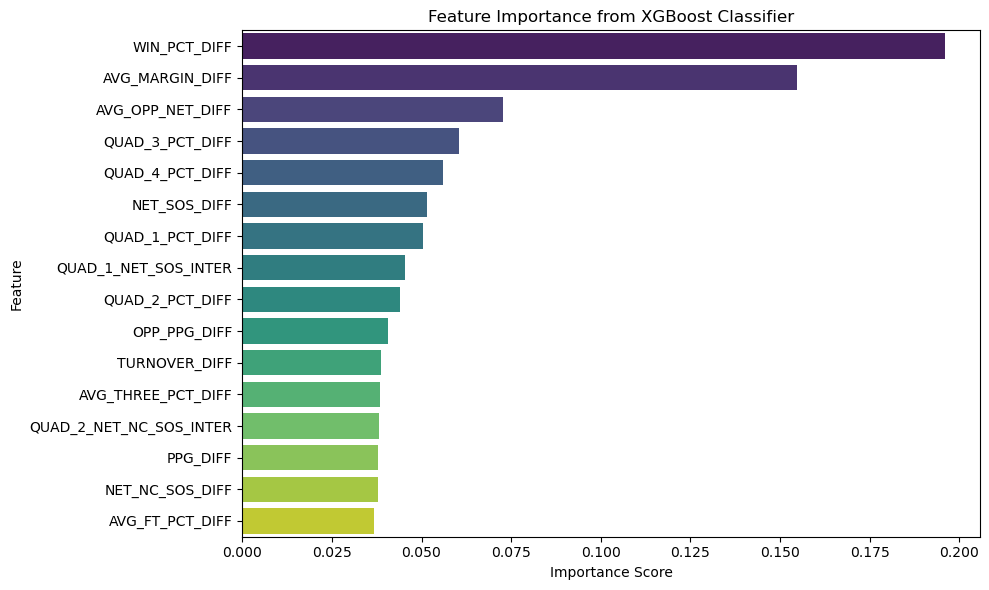

In [67]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', hue='Feature', legend=False, palette='viridis')
plt.title("Feature Importance from XGBoost Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


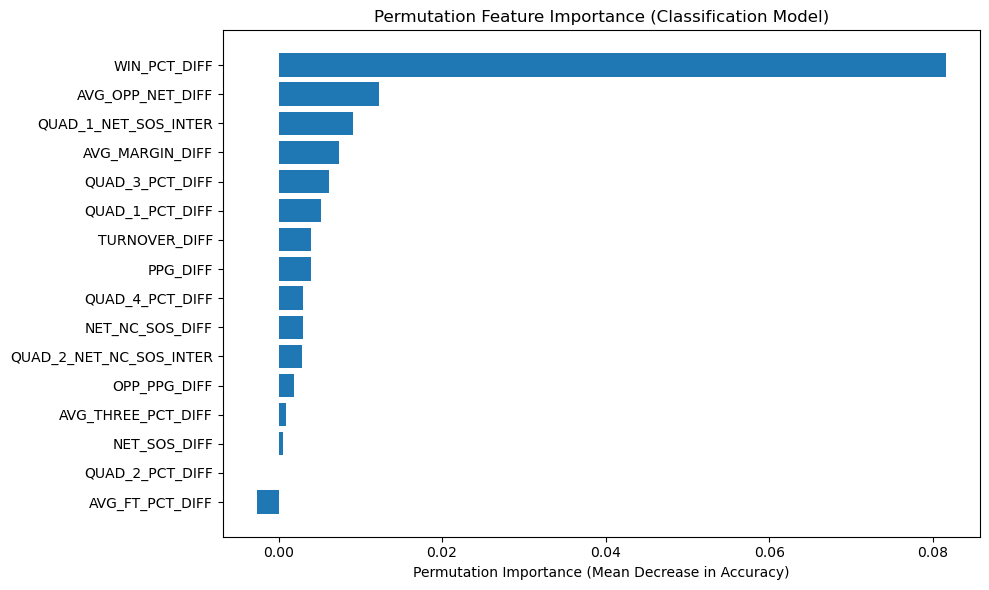

In [68]:
# Only for classification model
result = permutation_importance(
    clf, X_test, y_test_cls,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Sort by importance
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_cols)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance (Mean Decrease in Accuracy)")
plt.title("Permutation Feature Importance (Classification Model)")
plt.tight_layout()
plt.show()


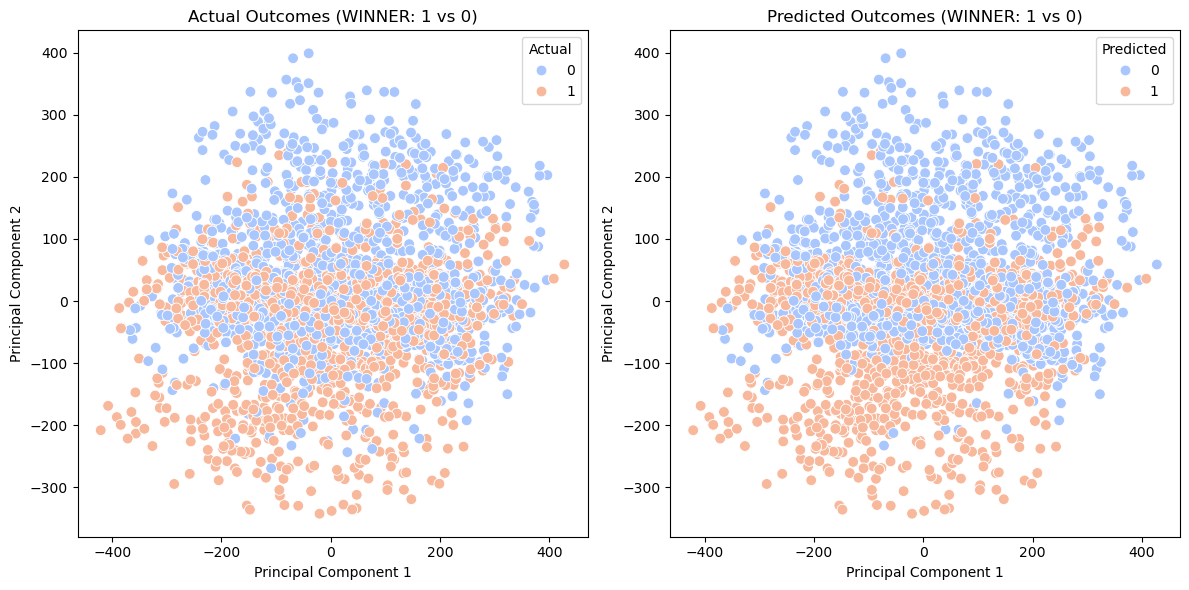

In [69]:
# Fill missing values with column means
X_filled = X.fillna(X.mean())

# Apply PCA to reduce feature space to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filled)

# Re-train the classifier on PCA-reduced data
clf_pca = xgb.XGBClassifier(eval_metric='logloss')

clf_pca.fit(X_pca, y_class)

# Get predictions
y_pred_pca = clf_pca.predict(X_pca)

# Create DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Actual': y_class,
    'Predicted': y_pred_pca
})

# Plot decision regions: actual vs predicted
plt.figure(figsize=(12, 6))

# Plot by actual
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Actual', palette='coolwarm', s=60)
plt.title("Actual Outcomes (WINNER: 1 vs 0)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot by predicted
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Predicted', palette='coolwarm', s=60)
plt.title("Predicted Outcomes (WINNER: 1 vs 0)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correct vs Incorrect Predictions')

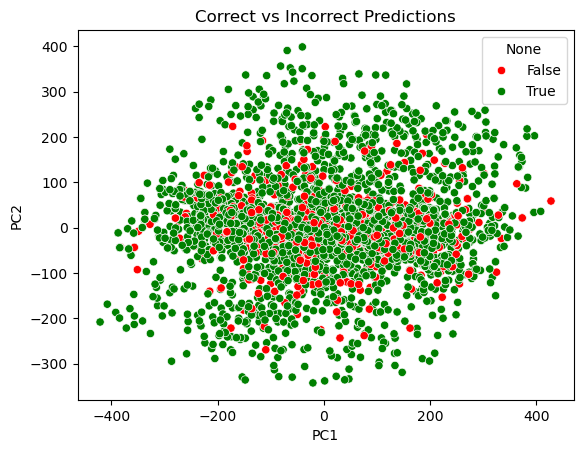

In [70]:
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue=(pca_df['Actual'] == pca_df['Predicted']),
    palette={True: 'green', False: 'red'},
    legend='brief'
)
plt.title("Correct vs Incorrect Predictions")


In [71]:
# Identify misclassified games
misclassified = pca_df[pca_df['Actual'] != pca_df['Predicted']]

# Count how many were misclassified
num_errors = len(misclassified)
total = len(pca_df)
accuracy = (total - num_errors) / total

# Show a sample of misclassified points
sample_errors = misclassified.sample(n=min(10, num_errors), random_state=42)

(num_errors, total, accuracy, sample_errors)


(1114,
 5152,
 0.7837732919254659,
              PC1         PC2  Actual  Predicted
 4065  107.365709  -34.504078       1          0
 404    47.730587  -16.032222       1          0
 5134  193.832289   19.687846       1          0
 3509   82.614203   61.004697       1          0
 1335  154.205916  -13.926777       0          1
 4029  -46.058148  -13.790633       0          1
 4402  140.109476  -44.411000       1          0
 1187  162.264324 -221.399878       0          1
 505     1.209201   -9.905745       1          0
 4756   31.018156 -121.525534       0          1)

## Checking for Overfitting

In [72]:
train_acc = clf.score(X_train, y_train_cls)
test_acc = clf.score(X_test, y_test_cls)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.8733317156030089
Testing Accuracy: 0.7080504364694471


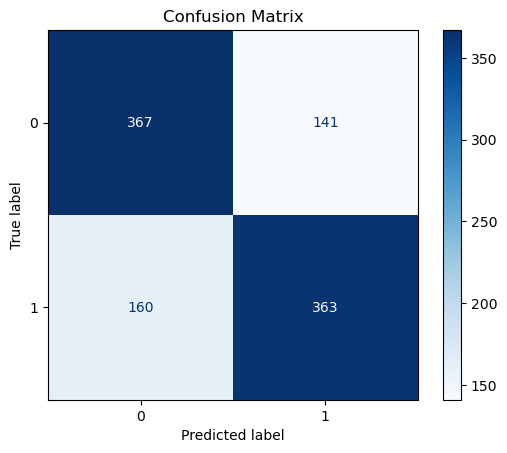

In [73]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_cls, clf.predict(X_test))

# Create a display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot it
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


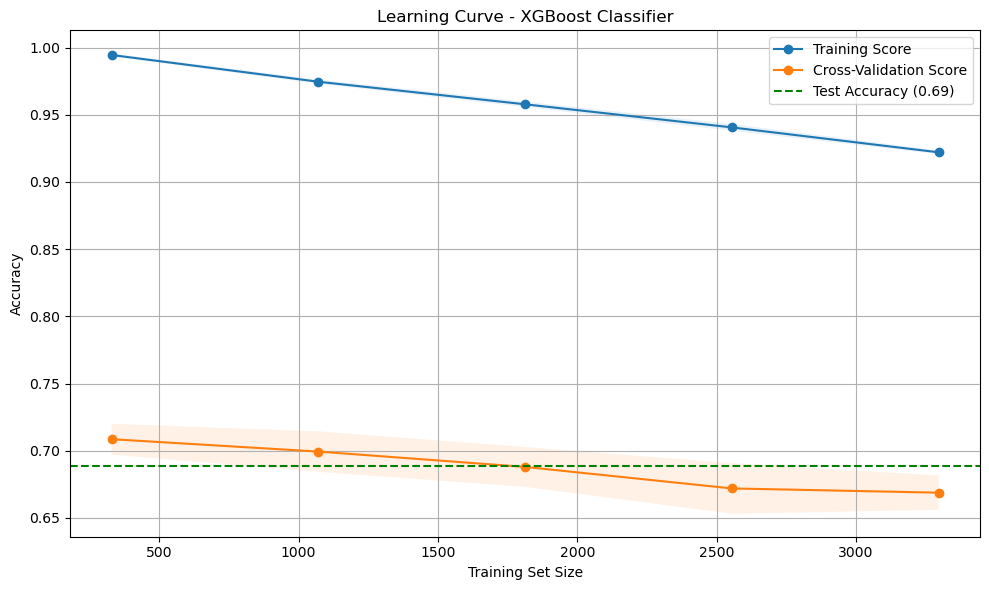

In [74]:
# Get top classes
top_classes = [cls for cls, count in Counter(y_class).most_common(10)]
mask = np.isin(y_class, top_classes)
X_top = X[mask]
y_top = y_class[mask]

# Encode class labels
le = LabelEncoder()
y_top_encoded = le.fit_transform(y_top)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y_top_encoded, test_size=0.2, random_state=42, stratify=y_top_encoded)

# Define model
model = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit on training and evaluate on test
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'  # Or 'warn' to skip bad folds
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, val_mean, label="Cross-Validation Score", marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

plt.axhline(y=test_accuracy, color='green', linestyle='--', label=f"Test Accuracy ({test_accuracy:.2f})")

plt.title("Learning Curve - XGBoost Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
print(f"Training Accuracy (final point): {train_mean[-1]:.4f}")
print(f"Validation Accuracy (final point): {val_mean[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy (final point): 0.9221
Validation Accuracy (final point): 0.6688
Test Accuracy: 0.6887


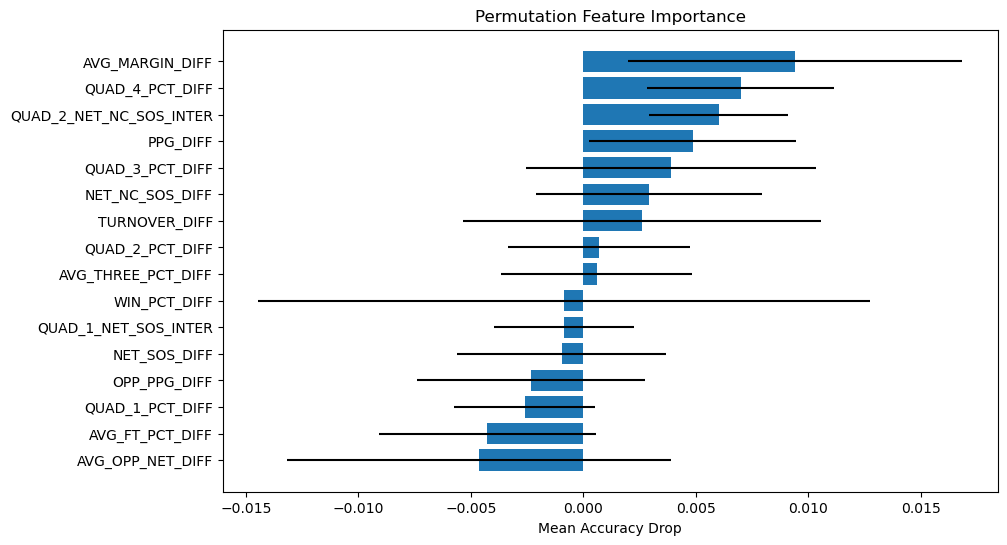

In [76]:
# Assuming clf is your trained XGBoost classifier and X_test, y_test_cls are defined
perm = permutation_importance(clf, X_test, y_test_cls, n_repeats=10, random_state=42, scoring='accuracy')

# Format the results
importances = perm.importances_mean
stds = perm.importances_std
features = clf.feature_names_in_

# Create a DataFrame for display
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances,
    'Std': stds
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std'])
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance")
plt.xlabel("Mean Accuracy Drop")
plt.show()


# Setting up the Bracket

In [77]:
# Entries for the First Four play-in teams
regions_data["South"][1] = ("16", "Winner of Alabama St. vs St. Francis")
regions_data["South"][9] = ("11", "Winner of San Diego St. vs North Carolina")
regions_data["East"][1] = ("16", "Winner of American vs Mt. St. Mary's")
regions_data["Midwest"][1] = ("16", "Winner of Texas vs Xavier")

# Format teams into a flat list to plug into the bracket
all_teams_flat = []
for region in ["South", "West", "East", "Midwest"]:
    teams = regions_data[region]
    for seed, name in teams:
        all_teams_flat.append(f"({seed}) {name}")

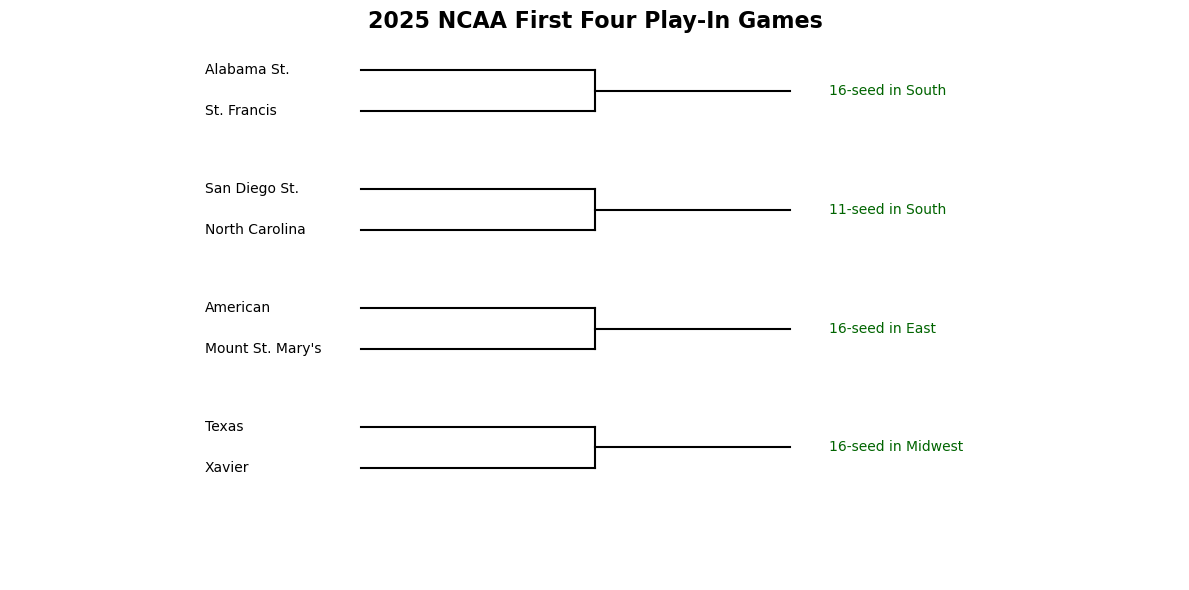

In [78]:
# Draw the First Four bracket
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
plt.title("2025 NCAA First Four Play-In Games", fontsize=16, weight='bold')

# Define play-in matchups
play_in_games = [
    ("Alabama St.", "St. Francis", "16-seed in South"),
    ("San Diego St.", "North Carolina", "11-seed in South"),
    ("American", "Mount St. Mary's", "16-seed in East"),
    ("Texas", "Xavier", "16-seed in Midwest")
]

# Bracket layout settings
start_y = 14
spacing_y = 3.5

for i, (team1, team2, slot) in enumerate(play_in_games):
    y1 = start_y - i * spacing_y
    y2 = y1 - 1.2

    # Team names
    ax.text(1, y1, team1, ha='left', va='center', fontsize=10)
    ax.text(1, y2, team2, ha='left', va='center', fontsize=10)

    # Horizontal lines
    ax.plot([1.8, 3], [y1, y1], color='black')
    ax.plot([1.8, 3], [y2, y2], color='black')
    ax.plot([3, 3], [y1, y2], color='black')  # connector
    ax.plot([3, 4], [(y1 + y2) / 2, (y1 + y2) / 2], color='black')  # output line

    # Label destination
    ax.text(4.2, (y1 + y2) / 2, slot, va='center', fontsize=10, color='darkgreen')

plt.xlim(0, 6)
plt.ylim(-1, start_y + 1)
plt.tight_layout()
plt.show()


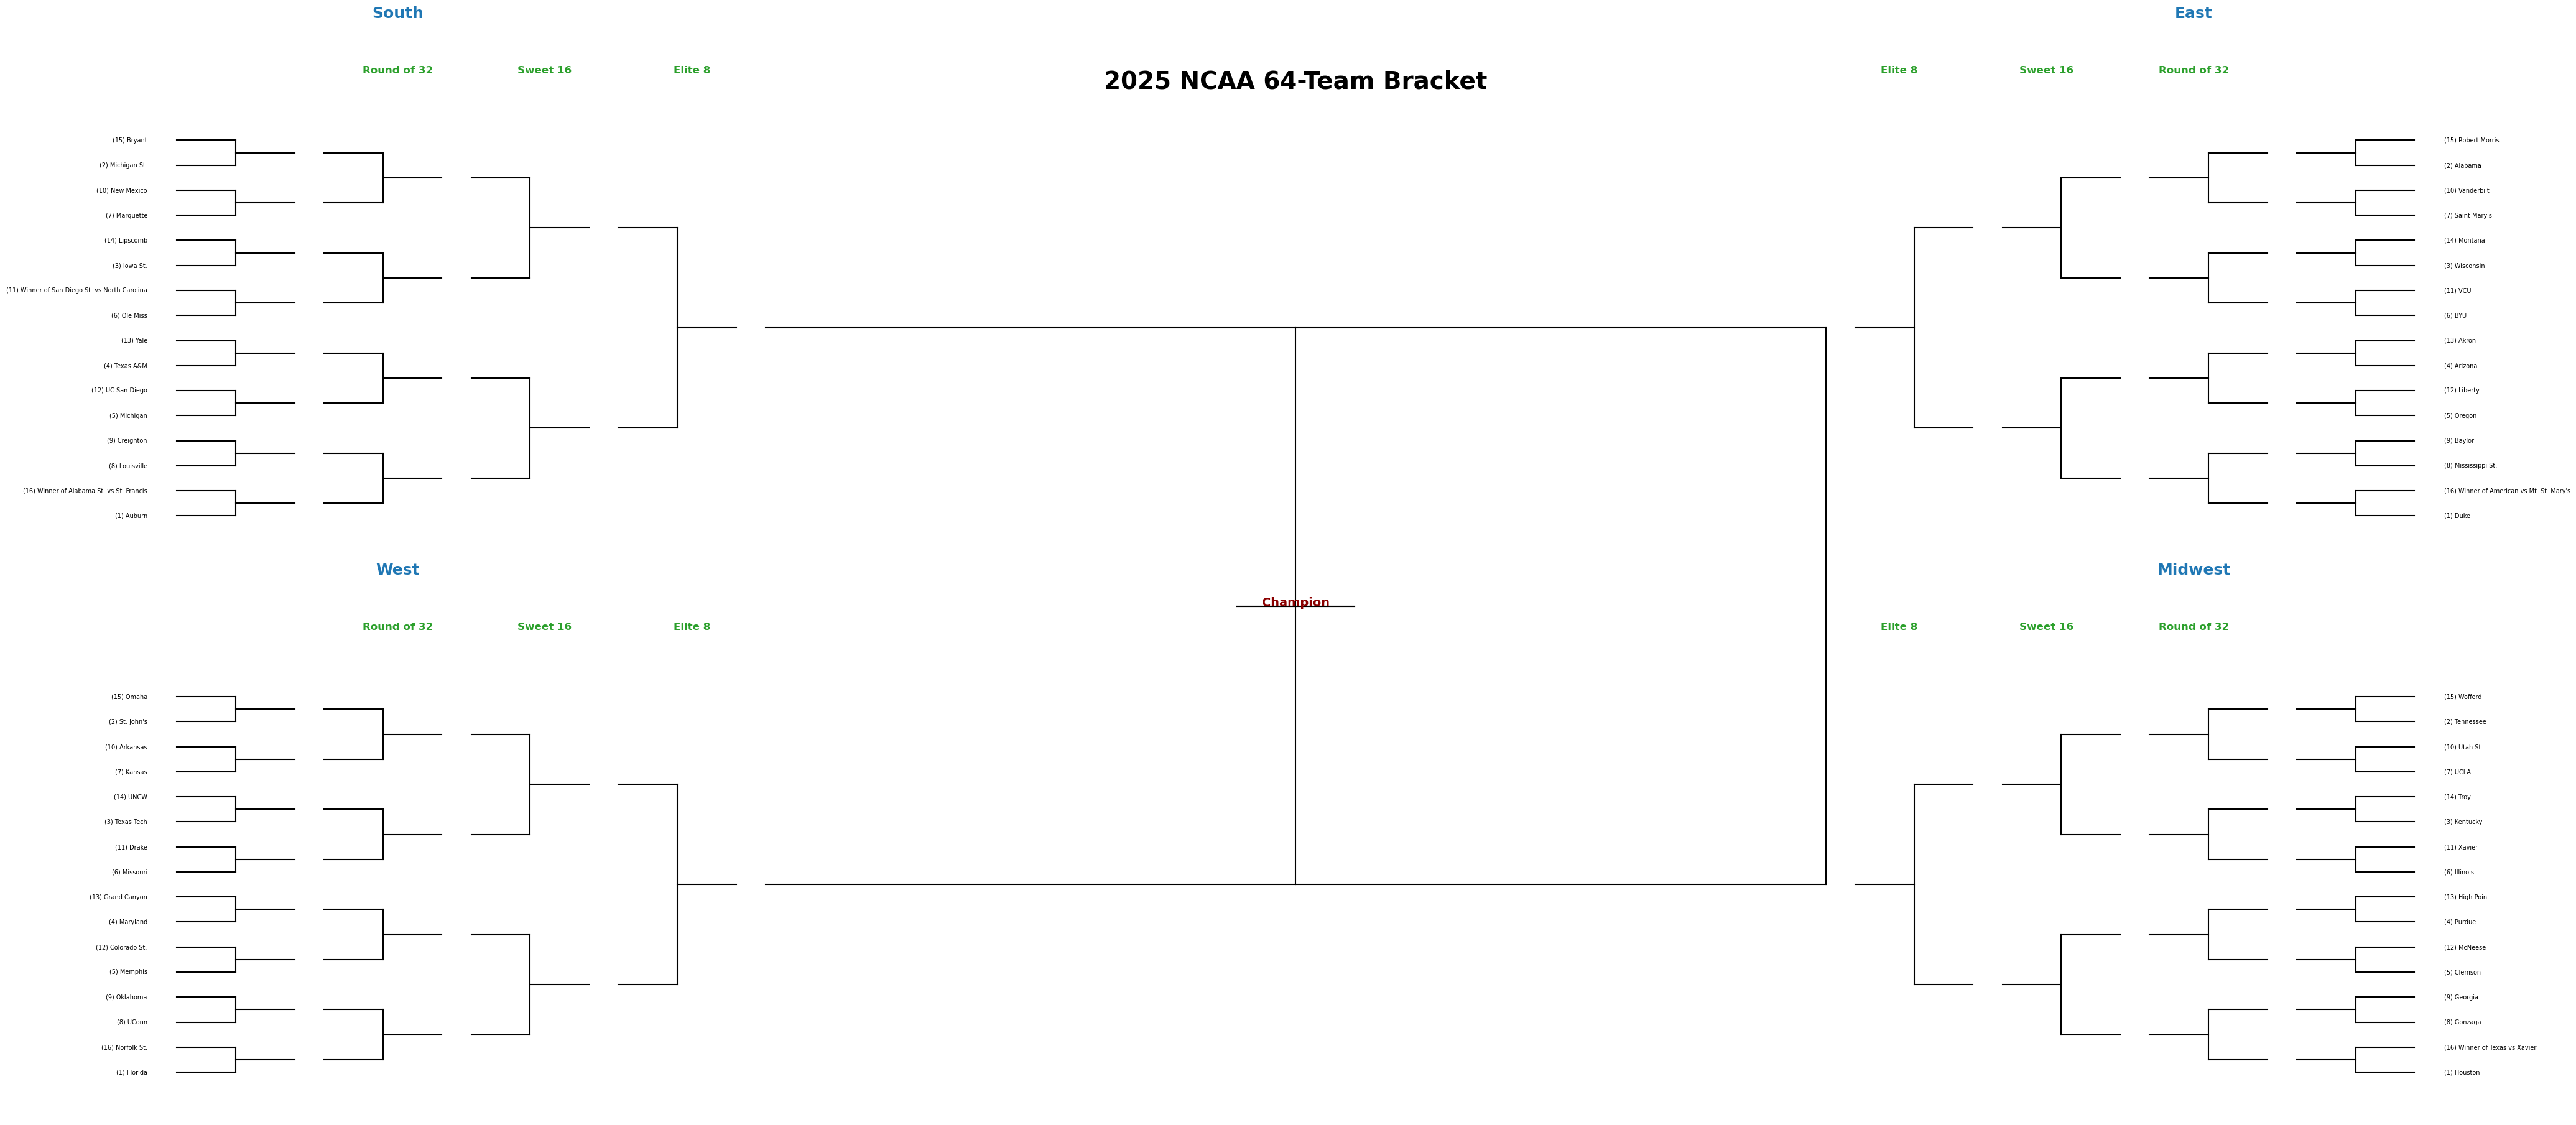

In [79]:
import matplotlib.pyplot as plt

def draw_classic_bracket(all_teams_flat):
    teams_per_region = 16
    round_spacing = 2.5
    vertical_spacing = 1.8  # Fixed spacing between teams

    fig, ax = plt.subplots(figsize=(42, 18))
    ax.axis('off')
    plt.title("2025 NCAA 64-Team Bracket", fontsize=28, weight='bold')

    region_color = '#1f77b4'
    round_label_color = '#2ca02c'
    small_font_props = {'fontsize': 7}
    bold_font = {'fontsize': 12, 'weight': 'bold'}

    round_names = ["Round of 64", "Round of 32", "Sweet 16", "Elite 8"]
    num_rounds = len(round_names)

    def draw_region(start_x, start_y, direction, team_list, region_name):
        # Draw team names and Round of 64
        positions = []
        for i in range(0, len(team_list), 2):
            y1 = start_y + i * vertical_spacing
            y2 = start_y + (i + 1) * vertical_spacing
            mid_y = (y1 + y2) / 2

            ax.text(start_x - 0.5 * direction, y1, team_list[i],
                    va='center', ha='right' if direction == 1 else 'left', **small_font_props)
            ax.text(start_x - 0.5 * direction, y2, team_list[i+1],
                    va='center', ha='right' if direction == 1 else 'left', **small_font_props)

            ax.plot([start_x, start_x + direction], [y1, y1], color='black')
            ax.plot([start_x, start_x + direction], [y2, y2], color='black')
            ax.plot([start_x + direction, start_x + direction], [y1, y2], color='black')
            ax.plot([start_x + direction, start_x + 2 * direction], [mid_y, mid_y], color='black')

            positions.append(mid_y)

        # Draw next rounds
        for rnd in range(1, num_rounds):
            new_positions = []
            for i in range(0, len(positions), 2):
                y1 = positions[i]
                y2 = positions[i + 1]
                mid_y = (y1 + y2) / 2

                x = start_x + rnd * round_spacing * direction
                ax.plot([x, x + direction], [y1, y1], color='black')
                ax.plot([x, x + direction], [y2, y2], color='black')
                ax.plot([x + direction, x + direction], [y1, y2], color='black')
                ax.plot([x + direction, x + 2 * direction], [mid_y, mid_y], color='black')

                new_positions.append(mid_y)

            positions = new_positions

            # Round label
            label_x = start_x + (rnd + 0.5) * round_spacing * direction
            label_y = start_y + (teams_per_region * vertical_spacing) + 3
            ax.text(label_x, label_y, round_names[rnd], ha='center', color=round_label_color, **bold_font)

        # Region label
        ax.text(start_x + (round_spacing * 1.5 * direction), start_y + (teams_per_region * vertical_spacing) + 7,
                region_name, color=region_color, ha='center', fontsize=18, weight='bold')

        return positions[0]

    # Split into regions
    south_teams = all_teams_flat[0:16]
    west_teams = all_teams_flat[16:32]
    east_teams = all_teams_flat[32:48]
    midwest_teams = all_teams_flat[48:64]

    # Positioning
    left_x = 2
    right_x = 40
    top_y = 65
    bottom_y = 25

    # Draw each region
    south_final = draw_region(left_x, top_y, 1, south_teams, "South")
    west_final = draw_region(left_x, bottom_y, 1, west_teams, "West")
    east_final = draw_region(right_x, top_y, -1, east_teams, "East")
    midwest_final = draw_region(right_x, bottom_y, -1, midwest_teams, "Midwest")

    # Final Four and Championship
    center_x = (left_x + right_x) / 2
    left_final_x = left_x + round_spacing * num_rounds
    right_final_x = right_x - round_spacing * num_rounds

    ax.plot([left_final_x, center_x], [south_final, south_final], color='black')
    ax.plot([left_final_x, center_x], [west_final, west_final], color='black')
    ax.plot([center_x, center_x], [south_final, west_final], color='black')

    ax.plot([right_final_x, center_x], [east_final, east_final], color='black')
    ax.plot([right_final_x, center_x], [midwest_final, midwest_final], color='black')
    ax.plot([right_final_x, right_final_x], [east_final, midwest_final], color='black')

    final_y_left = (south_final + west_final) / 2
    final_y_right = (east_final + midwest_final) / 2

    ax.plot([center_x, center_x + 1], [final_y_left, final_y_left], color='black')
    ax.plot([center_x, center_x - 1], [final_y_right, final_y_right], color='black')
    ax.plot([center_x + 1, center_x - 1], [final_y_left, final_y_right], color='black')

    ax.text(center_x, (final_y_left + final_y_right) / 2, "Champion",
            fontsize=14, ha='center', weight='bold', color='darkred')

    plt.tight_layout()
    plt.show()

draw_classic_bracket(all_teams_flat)

# Simulations

## First Four In

In [80]:
# === Merge the calculated team stats back into final_merged_df ===
final_merged_df = final_merged_df.merge(
    team_stats[['TEAM', 'PPG', 'OPP_PPG', 'TURNOVER', 'AVG_FT_PCT', 'AVG_THREE_PCT', 'AVG_MARGIN']],
    on='TEAM',
    how='left'
)

print(final_merged_df.columns.tolist())

['BIGDATABALL DATASET', 'GAME-ID_x', 'DATE', 'TEAM', 'ASSOCIATION & DIVISION', 'CONFERENCE', 'ARENA & STATE', 'VENUE', '1H', '2H', 'OT TOTAL', 'SCORE', 'MIN_x', 'FG_x', 'FGA_x', '3P_x', '3PA_x', 'FT_x', 'FTA_x', 'OR_x', 'DR_x', 'TOT_x', 'A_x', 'PF_x', 'ST_x', 'TO_x', 'BL_x', 'PTS_x', 'POSS', 'PACE', 'OEFF', 'DEFF', 'STARTING LINEUPS', 'UNNAMED: 33', 'UNNAMED: 34', 'UNNAMED: 35', 'UNNAMED: 36', 'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL', 'LINE MOVEMENT #1', 'LINE MOVEMENT #2', 'LINE MOVEMENT #3', 'CLOSING ODDS', 'CLOSING SPREAD', 'CLOSING TOTAL', 'CLOSING MONEYLINE', 'WINS', 'LOSES', 'WIN_PCT', 'NET_SOS', 'NET_NC_SOS', 'QUAD 1 WINS', 'QUAD 1 LOSSES', 'QUAD_1_PCT', 'QUAD 2 WINS', 'QUAD 2 LOSSES', 'QUAD_2_PCT', 'QUAD 3 WINS', 'QUAD 3 LOSSES', 'QUAD_3_PCT', 'QUAD 4 WINS', 'QUAD 4 LOSSES', 'QUAD_4_PCT', 'AVG_OPP_NET', 'GAME-ID_y', 'MIN_y', 'FG_y', 'FGA_y', '3P_y', '3PA_y', 'FT_y', 'FTA_y', 'OR_y', 'DR_y', 'TOT_y', 'A_y', 'PF_y', 'ST_y', 'TO_y', 'BL_y', 'PTS_y', 'USAGE RATE (%)', 'SEE

In [81]:
# === Play-In (First Four) Teams and their Seeds ===
play_in_seed_map = {
    "Alabama St.": 16,    # 16-seed South
    "St. Francis": 16,    # 16-seed South
    "San Diego St.": 11,  # 11-seed South
    "North Carolina": 11, # 11-seed South
    "American": 16,       # 16-seed East
    "Mount St. Mary's": 16, # 16-seed East
    "Texas": 16,          # 16-seed Midwest
    "Xavier": 16          # 16-seed Midwest
}


In [82]:
raw_features = [
    'NET_SOS', 'NET_NC_SOS', 'AVG_OPP_NET',
    'QUAD_1_PCT', 'QUAD_2_PCT', 'QUAD_3_PCT', 'QUAD_4_PCT',
    'PPG', 'OPP_PPG', 'TURNOVER', 'AVG_FT_PCT', 'AVG_THREE_PCT',
    'AVG_MARGIN', 'WIN_PCT', 'AVG_OT'  
]

def simulate_play_in_games(
    matchup_list, final_merged_df, classifier, regressor1, regressor2,
    raw_features, team_name_map={}, team_seed_map={}, play_in_seed_map={}, round_name="Play-In"
):
    results = []

    for matchup in matchup_list:
        if len(matchup) == 3:
            team1, team2, region = matchup
        else:
            team1, team2 = matchup
            region = round_name

        try:
            # Map team names
            team1_mapped = team_name_map.get(team1, team1)
            team2_mapped = team_name_map.get(team2, team2)

            # Extract stats
            row1 = final_merged_df[final_merged_df['TEAM'].str.lower().str.strip() == team1_mapped.lower().strip()]
            row2 = final_merged_df[final_merged_df['TEAM'].str.lower().str.strip() == team2_mapped.lower().strip()]

            if row1.empty or row2.empty:
                raise ValueError(f"Missing team data: {team1_mapped if row1.empty else team2_mapped}")

            stats1 = row1.iloc[-1][raw_features]
            stats2 = row2.iloc[-1][raw_features]
            stats_1_dict = dict(zip(raw_features, stats1))
            stats_2_dict = dict(zip(raw_features, stats2))

            # Seeds
            seed1 = team_seed_map.get(team1, play_in_seed_map.get(team1, 0))
            seed2 = team_seed_map.get(team2, play_in_seed_map.get(team2, 0))

            # Feature differences
            features = {
                'NET_SOS_DIFF': stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS'],
                'NET_NC_SOS_DIFF': stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS'],
                'AVG_OPP_NET_DIFF': stats_1_dict['AVG_OPP_NET'] - stats_2_dict['AVG_OPP_NET'],
                'QUAD_1_PCT_DIFF': stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT'],
                'QUAD_2_PCT_DIFF': stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT'],
                'QUAD_3_PCT_DIFF': stats_1_dict['QUAD_3_PCT'] - stats_2_dict['QUAD_3_PCT'],
                'QUAD_4_PCT_DIFF': stats_1_dict['QUAD_4_PCT'] - stats_2_dict['QUAD_4_PCT'],
                'PPG_DIFF': stats_1_dict['PPG'] - stats_2_dict['PPG'],
                'OPP_PPG_DIFF': stats_1_dict['OPP_PPG'] - stats_2_dict['OPP_PPG'],
                'TURNOVER_DIFF': stats_1_dict['TURNOVER'] - stats_2_dict['TURNOVER'],
                'AVG_FT_PCT_DIFF': stats_1_dict['AVG_FT_PCT'] - stats_2_dict['AVG_FT_PCT'],
                'AVG_THREE_PCT_DIFF': stats_1_dict['AVG_THREE_PCT'] - stats_2_dict['AVG_THREE_PCT'],
                'AVG_MARGIN_DIFF': stats_1_dict['AVG_MARGIN'] - stats_2_dict['AVG_MARGIN'],
                'WIN_PCT_DIFF': 0,
                'QUAD_1_NET_SOS_INTER': (stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT']) * (stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS']),
                'QUAD_2_NET_NC_SOS_INTER': (stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT']) * (stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS']),
            }

            # Predict scores
            matchup_input = pd.DataFrame([features])[classifier.feature_names_in_]
            pred_score1 = round(regressor1.predict(matchup_input)[0])
            pred_score2 = round(regressor2.predict(matchup_input)[0])
            score_diff = abs(pred_score1 - pred_score2)

            avg_ot1 = stats_1_dict.get('AVG_OT', 0)
            avg_ot2 = stats_2_dict.get('AVG_OT', 0)

            used_ot = False

            if score_diff <= 8:
                tiebreaker1 = (-int(seed1)) + avg_ot1
                tiebreaker2 = (-int(seed2)) + avg_ot2

                if tiebreaker1 > tiebreaker2:
                    winner = team1
                    pred_score1 += round(avg_ot1)  
                    used_ot = True
                elif tiebreaker2 > tiebreaker1:
                    winner = team2
                    pred_score2 += round(avg_ot2)  
                    used_ot = True
                else:
                    winner = team1 if pred_score1 >= pred_score2 else team2
            else:
                winner = team1 if pred_score1 > pred_score2 else team2

            results.append((team1, pred_score1, team2, pred_score2, winner, region, used_ot))

        except Exception as e:
            results.append((team1, None, team2, None, f"Error: {e}", region, False))

    return results


In [83]:
# === Run First Four simulations ===
play_in_results = simulate_play_in_games(
    matchup_list=play_in_games,
    final_merged_df=final_merged_df,
    classifier=clf,
    regressor1=reg1,
    regressor2=reg2,
    raw_features=raw_features,  # Include AVG_OT
    team_name_map=team_name_map,
    team_seed_map=team_seed_map,
    play_in_seed_map=play_in_seed_map,
    round_name="First Four"
)


In [84]:
print("\n=== First Four Results ===")
for team1, score1, team2, score2, winner, region, used_ot in play_in_results:
    if isinstance(winner, str) and winner.startswith("Error"):
        print(f"{region}: {winner}")
    else:
        ot_label = " (OT)" if used_ot else ""
        print(f"{region}: {team1} {score1} - {score2} {team2} → Winner: {winner}{ot_label}")



=== First Four Results ===
16-seed in South: Alabama St. 81 - 70 St. Francis → Winner: Alabama St. (OT)
11-seed in South: San Diego St. 73 - 78 North Carolina → Winner: North Carolina (OT)
16-seed in East: American 85 - 68 Mount St. Mary's → Winner: American (OT)
16-seed in Midwest: Texas 87 - 71 Xavier → Winner: Texas (OT)


## First Round

In [85]:
# === Round of 64 matchups with seeds ===
round_of_64_games = {
    "South": [
        ("1", "Auburn"), ("16", "Alabama St."),
        ("8", "Louisville"), ("9", "Creighton"),
        ("5", "Michigan"), ("12", "UC San Diego"),
        ("4", "Texas A&M"), ("13", "Yale"),
        ("6", "Ole Miss"), ("11", "North Carolina"),
        ("3", "Iowa St."), ("14", "Lipscomb"),
        ("7", "Marquette"), ("10", "New Mexico"),
        ("2", "Michigan St."), ("15", "Bryant")
    ],
    "West": [
        ("1", "Florida"), ("16", "Norfolk St."),
        ("8", "UConn"), ("9", "Oklahoma"),
        ("5", "Memphis"), ("12", "Colorado St."),
        ("4", "Maryland"), ("13", "Grand Canyon"),
        ("6", "Missouri"), ("11", "Drake"),
        ("3", "Texas Tech"), ("14", "UNCW"),
        ("7", "Kansas"), ("10", "Arkansas"),
        ("2", "St. John's"), ("15", "Omaha")
    ],
    "East": [
        ("1", "Duke"), ("16", "Mount St. Mary's"),
        ("8", "Mississippi St."), ("9", "Baylor"),
        ("5", "Oregon"), ("12", "Liberty"),
        ("4", "Arizona"), ("13", "Akron"),
        ("6", "BYU"), ("11", "VCU"),
        ("3", "Wisconsin"), ("14", "Montana"),
        ("7", "Saint Mary's"), ("10", "Vanderbilt"),
        ("2", "Alabama"), ("15", "Robert Morris")
    ],
    "Midwest": [
        ("1", "Houston"), ("16", "SIU Edwardsville"),
        ("8", "Gonzaga"), ("9", "Georgia"),
        ("5", "Clemson"), ("12", "McNeese"),
        ("4", "Purdue"), ("13", "High Point"),
        ("6", "Illinois"), ("11", "Xavier"),
        ("3", "Kentucky"), ("14", "Troy"),
        ("7", "UCLA"), ("10", "Utah St."),
        ("2", "Tennessee"), ("15", "Wofford")
    ]
}


In [86]:
# === Team name map of all 64 Teams ===
team_name_map = {
    "St. Francis": "St. Francis (PA) Red Flash",
    "Alabama St.": "Alabama State Hornets",
    "Mount St. Mary's": "Mount St. Mary's Mountaineers",
    "San Diego St.": "San Diego State Aztecs",
    "Texas": "Texas Longhorns",
    "Xavier": "Xavier Musketeers",
    "American": "American University Eagles",
    "North Carolina": "North Carolina Tar Heels",
    "Auburn": "Auburn Tigers",
    "Louisville": "Louisville Cardinals",
    "Creighton": "Creighton Bluejays",
    "Michigan": "Michigan Wolverines",
    "UC San Diego": "UC San Diego Tritons",
    "Texas A&M": "Texas A&M Aggies",
    "Yale": "Yale Bulldogs",
    "Ole Miss": "Ole Miss Rebels",
    "Iowa St.": "Iowa State Cyclones",
    "Lipscomb": "Lipscomb Bisons",
    "Marquette": "Marquette Golden Eagles",
    "New Mexico": "New Mexico Lobos",
    "Michigan St.": "Michigan State Spartans",
    "Bryant": "Bryant Bulldogs",
    "Florida": "Florida Gators",
    "Norfolk": "Norfolk State Spartans",
    "Uconn": "UConn Huskies",
    "Oklahoma": "Oklahoma Sooners",
    "Memphis": "Memphis Tigers",
    "Colorado St.": "Colorado State Rams",
    "Maryland": "Maryland Terrapins",
    "Grand Canyon": "Grand Canyon Lopes",
    "Missouri": "Missouri Tigers",
    "Drake": "Drake Bulldogs",
    "Texas Tech": "Texas Tech Red Raiders",
    "UNCW": "UNC Wilmington Seahawks",
    "Kansas": "Kansas Jayhawks",
    "Arkansas": "Arkansas Razorbacks",
    "St. John's": "St. John's Red Storm",
    "Omaha": "Omaha Mavericks",
    "Duke": "Duke Blue Devils",
    "Mississippi St.": "Mississippi State Bulldogs",
    "Baylor": "Baylor Bears",
    "Oregon": "Oregon Ducks",
    "Liberty": "Liberty Flames",
    "Arizona": "Arizona Wildcats",
    "Akron": "Akron Zips",
    "BYU": "BYU Cougars",
    "VCU": "VCU Rams",
    "Wisconsin": "Wisconsin Badgers",
    "Montana": "Montana Grizzlies",
    "Vanderbilt": "Vanderbilt Commodores",
    "Alabama": "Alabama Crimson Tide",
    "Robert Morris": "Robert Morris Colonials",
    "Houston": "Houston Cougars",
    "SIU Edwardsville": "SIU Edwardsville Cougars",
    "Gonzaga": "Gonzaga Bulldogs",
    "Clemson": "Clemson Tigers",
    "McNeese": "McNeese Cowboys",
    "Purdue": "Purdue Boilermakers",
    "High Point": "High Point Panthers",
    "Illinois": "Illinois Fighting Illini",
    "Kentucky": "Kentucky Wildcats",
    "Troy": "Troy Trojans",
    "UCLA": "UCLA Bruins",
    "Utah St.": "Utah State Aggies",
    "Tennessee": "Tennessee Volunteers",
    "Wofford": "Wofford Terriers",
    "Norfolk St.": "Norfolk State Spartans",
    "UConn": "UConn Huskies",
    "Georgia": "Georgia Bulldogs",
    "Saint Mary's": "Saint Mary's Gaels"
}

In [87]:
# === Rename columns to match model training features ===
column_rename_map = {
    'WIN PERCENTAGE': 'WIN_PCT',
    'QUAD 1 WIN PERCENTAGE': 'QUAD_1_PCT',
    'QUAD 2 WIN PERCENTAGE': 'QUAD_2_PCT',
    'QUAD 3 WIN PERCENTAGE': 'QUAD_3_PCT',
    'QUAD 4 WIN PERCENTAGE': 'QUAD_4_PCT',
    'NET SOS': 'NET_SOS',
    'NET NC SOS': 'NET_NC_SOS',
    'AVG OPP NET': 'AVG_OPP_NET',
    'F': 'SCORE'
}
final_merged_df = final_merged_df.rename(columns=column_rename_map)

# Raw features (make sure it matches what model expects + AVG_OT for tiebreak)
raw_features = [
    'NET_SOS', 'NET_NC_SOS', 'AVG_OPP_NET',
    'QUAD_1_PCT', 'QUAD_2_PCT', 'QUAD_3_PCT', 'QUAD_4_PCT',
    'PPG', 'OPP_PPG', 'TURNOVER', 'AVG_FT_PCT', 'AVG_THREE_PCT',
    'AVG_MARGIN', 'WIN_PCT', 'AVG_OT'
]

# Helper function
def get_team_stats(team_name, df, features, team_name_map):
    mapped_name = team_name_map.get(team_name, team_name)
    team_series = df['TEAM'].str.lower().str.strip()
    mapped_name_clean = mapped_name.lower().strip()
    row = df[team_series == mapped_name_clean]
    if row.empty:
        return None
    return row.iloc[-1][features].values

# === Simulate Round of 64 ===
next_round_results = []

print("\n=== Round of 64 Results ===")

for region, games in round_of_64_games.items():
    for i in range(0, len(games), 2):
        seed1, team1 = games[i]
        seed2, team2 = games[i+1]

        try:
            stats_1 = get_team_stats(team1, final_merged_df, raw_features, team_name_map)
            stats_2 = get_team_stats(team2, final_merged_df, raw_features, team_name_map)

            if stats_1 is None or stats_2 is None:
                raise ValueError(f"Missing stats for {team1 if stats_1 is None else team2}")

            stats_1_dict = dict(zip(raw_features, stats_1))
            stats_2_dict = dict(zip(raw_features, stats_2))

            # Build matchup feature row
            row = {
                'NET_SOS_DIFF': stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS'],
                'NET_NC_SOS_DIFF': stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS'],
                'AVG_OPP_NET_DIFF': stats_1_dict['AVG_OPP_NET'] - stats_2_dict['AVG_OPP_NET'],
                'QUAD_1_PCT_DIFF': stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT'],
                'QUAD_2_PCT_DIFF': stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT'],
                'QUAD_3_PCT_DIFF': stats_1_dict['QUAD_3_PCT'] - stats_2_dict['QUAD_3_PCT'],
                'QUAD_4_PCT_DIFF': stats_1_dict['QUAD_4_PCT'] - stats_2_dict['QUAD_4_PCT'],
                'PPG_DIFF': stats_1_dict['PPG'] - stats_2_dict['PPG'],
                'OPP_PPG_DIFF': stats_1_dict['OPP_PPG'] - stats_2_dict['OPP_PPG'],
                'TURNOVER_DIFF': stats_1_dict['TURNOVER'] - stats_2_dict['TURNOVER'],
                'AVG_FT_PCT_DIFF': stats_1_dict['AVG_FT_PCT'] - stats_2_dict['AVG_FT_PCT'],
                'AVG_THREE_PCT_DIFF': stats_1_dict['AVG_THREE_PCT'] - stats_2_dict['AVG_THREE_PCT'],
                'AVG_MARGIN_DIFF': stats_1_dict['AVG_MARGIN'] - stats_2_dict['AVG_MARGIN'],
                'WIN_PCT_DIFF': 0,
                'QUAD_1_NET_SOS_INTER': (stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT']) * (stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS']),
                'QUAD_2_NET_NC_SOS_INTER': (stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT']) * (stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS']),
                'SEED_DIFF': int(seed1) - int(seed2)
            }

            matchup_input = pd.DataFrame([row])[clf.feature_names_in_]

            # Predict scores
            pred_score1 = round(reg1.predict(matchup_input)[0])
            pred_score2 = round(reg2.predict(matchup_input)[0])
            score_diff = abs(pred_score1 - pred_score2)

            avg_ot1 = stats_1_dict.get('AVG_OT', 0)
            avg_ot2 = stats_2_dict.get('AVG_OT', 0)
            used_ot = False

            # === Tiebreaker using seed + avg_ot ===
            if score_diff <= 8:
                tiebreaker1 = (-int(seed1)) + avg_ot1
                tiebreaker2 = (-int(seed2)) + avg_ot2

                if tiebreaker1 > tiebreaker2:
                    winner = team1
                    pred_score1 += round(avg_ot1)
                    used_ot = True
                elif tiebreaker2 > tiebreaker1:
                    winner = team2
                    pred_score2 += round(avg_ot2)
                    used_ot = True
                else:
                    winner = team1 if pred_score1 >= pred_score2 else team2
            else:
                winner = team1 if pred_score1 > pred_score2 else team2

            # Save
            next_round_results.append((region, team1, seed1, pred_score1, team2, seed2, pred_score2, winner))

            # Print
            ot_label = " (OT)" if used_ot else ""
            print(f"{region:<10}: ({seed1}) {team1:<20} {pred_score1} - {pred_score2} ({seed2}) {team2:<20} → Winner: {winner}{ot_label}")

        except Exception as e:
            next_round_results.append((region, team1, seed1, None, team2, seed2, None, f"Error: {e}"))
            print(f"{region}: Error predicting matchup between {team1} and {team2} → {e}")



=== Round of 64 Results ===
South     : (1) Auburn               90 - 51 (16) Alabama St.          → Winner: Auburn
South     : (8) Louisville           73 - 97 (9) Creighton            → Winner: Creighton (OT)
South     : (5) Michigan             81 - 72 (12) UC San Diego         → Winner: Michigan
South     : (4) Texas A&M            88 - 69 (13) Yale                 → Winner: Texas A&M
South     : (6) Ole Miss             87 - 72 (11) North Carolina       → Winner: Ole Miss (OT)
South     : (3) Iowa St.             84 - 66 (14) Lipscomb             → Winner: Iowa St.
South     : (7) Marquette            94 - 81 (10) New Mexico           → Winner: Marquette (OT)
South     : (2) Michigan St.         96 - 60 (15) Bryant               → Winner: Michigan St.
West      : (1) Florida              91 - 50 (16) Norfolk St.          → Winner: Florida
West      : (8) UConn                90 - 70 (9) Oklahoma             → Winner: UConn (OT)
West      : (5) Memphis              89 - 79 (12) Co

## Second Round

In [88]:
from collections import defaultdict
import pandas as pd
import numpy as np

# === Step 1: Group winners from previous round ===
region_winners = defaultdict(list)

for result in next_round_results:
    region, team1, seed1, score1, team2, seed2, score2, winner = result
    if not isinstance(winner, str) or not winner.startswith("Error"):
        region_winners[region].append((winner, seed1 if winner == team1 else seed2))

# === Step 2: Build Round of 32 matchups ===
round_of_32_games = {}

for region, winners in region_winners.items():
    matchups = []
    for i in range(0, len(winners), 2):
        team1, seed1 = winners[i]
        team2, seed2 = winners[i+1]
        matchup = (seed1, team1, seed2, team2)
        matchups.append(matchup)
    round_of_32_games[region] = matchups

# === Step 3: Simulate Round of 32 ===
second_round_results = []

print("\n=== Round of 32 Results ===")

for region, games in round_of_32_games.items():
    for seed1, team1, seed2, team2 in games:
        try:
            stats_1 = get_team_stats(team1, final_merged_df, raw_features, team_name_map)
            stats_2 = get_team_stats(team2, final_merged_df, raw_features, team_name_map)

            if stats_1 is None or stats_2 is None:
                raise ValueError(f"Missing stats for {team1 if stats_1 is None else team2}")

            stats_1_dict = dict(zip(raw_features, stats_1))
            stats_2_dict = dict(zip(raw_features, stats_2))

            # Feature differences
            row = {
                'NET_SOS_DIFF': stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS'],
                'NET_NC_SOS_DIFF': stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS'],
                'AVG_OPP_NET_DIFF': stats_1_dict['AVG_OPP_NET'] - stats_2_dict['AVG_OPP_NET'],
                'QUAD_1_PCT_DIFF': stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT'],
                'QUAD_2_PCT_DIFF': stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT'],
                'QUAD_3_PCT_DIFF': stats_1_dict['QUAD_3_PCT'] - stats_2_dict['QUAD_3_PCT'],
                'QUAD_4_PCT_DIFF': stats_1_dict['QUAD_4_PCT'] - stats_2_dict['QUAD_4_PCT'],
                'PPG_DIFF': stats_1_dict['PPG'] - stats_2_dict['PPG'],
                'OPP_PPG_DIFF': stats_1_dict['OPP_PPG'] - stats_2_dict['OPP_PPG'],
                'TURNOVER_DIFF': stats_1_dict['TURNOVER'] - stats_2_dict['TURNOVER'],
                'AVG_FT_PCT_DIFF': stats_1_dict['AVG_FT_PCT'] - stats_2_dict['AVG_FT_PCT'],
                'AVG_THREE_PCT_DIFF': stats_1_dict['AVG_THREE_PCT'] - stats_2_dict['AVG_THREE_PCT'],
                'AVG_MARGIN_DIFF': stats_1_dict['AVG_MARGIN'] - stats_2_dict['AVG_MARGIN'],
                'WIN_PCT_DIFF': 0,
                'QUAD_1_NET_SOS_INTER': (stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT']) * (stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS']),
                'QUAD_2_NET_NC_SOS_INTER': (stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT']) * (stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS'])
            }

            matchup_input = pd.DataFrame([row])[clf.feature_names_in_]

            pred_score1 = round(reg1.predict(matchup_input)[0])
            pred_score2 = round(reg2.predict(matchup_input)[0])
            score_diff = abs(pred_score1 - pred_score2)

            avg_ot1 = stats_1_dict.get('AVG_OT', 0)
            avg_ot2 = stats_2_dict.get('AVG_OT', 0)
            used_ot = False

            # === Tiebreaker using seed + avg OT ===
            if score_diff <= 8:
                tiebreaker1 = (-int(seed1)) + avg_ot1
                tiebreaker2 = (-int(seed2)) + avg_ot2

                if tiebreaker1 > tiebreaker2:
                    winner = team1
                    pred_score1 += round(avg_ot1)
                    used_ot = True
                elif tiebreaker2 > tiebreaker1:
                    winner = team2
                    pred_score2 += round(avg_ot2)
                    used_ot = True
                else:
                    winner = team1 if pred_score1 >= pred_score2 else team2
            else:
                winner = team1 if pred_score1 > pred_score2 else team2

            second_round_results.append((region, team1, seed1, pred_score1, team2, seed2, pred_score2, winner))

            # Print output
            ot_label = " (OT)" if used_ot else ""
            print(f"{region:<10}: ({seed1}) {team1:<20} {pred_score1} - {pred_score2} ({seed2}) {team2:<20} → Winner: {winner}{ot_label}")

        except Exception as e:
            second_round_results.append((region, team1, seed1, None, team2, seed2, None, f"Error: {e}"))
            print(f"{region}: Error predicting matchup between {team1} and {team2} → {e}")



=== Round of 32 Results ===
South     : (1) Auburn               81 - 65 (9) Creighton            → Winner: Auburn
South     : (5) Michigan             82 - 70 (4) Texas A&M            → Winner: Michigan
South     : (6) Ole Miss             68 - 83 (3) Iowa St.             → Winner: Iowa St.
South     : (7) Marquette            72 - 88 (2) Michigan St.         → Winner: Michigan St. (OT)
West      : (1) Florida              85 - 70 (8) UConn                → Winner: Florida
West      : (5) Memphis              88 - 79 (4) Maryland             → Winner: Memphis (OT)
West      : (6) Missouri             74 - 86 (3) Texas Tech           → Winner: Texas Tech (OT)
West      : (7) Kansas               68 - 78 (2) St. John's           → Winner: St. John's
East      : (1) Duke                 91 - 71 (8) Mississippi St.      → Winner: Duke
East      : (5) Oregon               66 - 80 (4) Arizona              → Winner: Arizona (OT)
East      : (6) BYU                  82 - 67 (3) Wisconsin    

## Sweet Sixteen

In [89]:
# === Build Sweet 16 Matchups ===
from collections import defaultdict
import pandas as pd
import numpy as np

# Step 1. Group winners from Round of 32
region_winners = defaultdict(list)

for result in second_round_results:
    region, team1, seed1, score1, team2, seed2, score2, winner = result
    if not isinstance(winner, str) or not winner.startswith("Error"):
        region_winners[region].append((winner, seed1 if winner == team1 else seed2))

# Step 2. Create Sweet 16 matchups
sweet_16_games = {}

for region, winners in region_winners.items():
    matchups = []
    for i in range(0, len(winners), 2):
        team1, seed1 = winners[i]
        team2, seed2 = winners[i+1]
        matchup = (seed1, team1, seed2, team2)
        matchups.append(matchup)
    sweet_16_games[region] = matchups

# === Step 3: Simulate Sweet 16 ===
sweet_16_results = []

print("\n=== Sweet 16 Results ===")

for region, games in sweet_16_games.items():
    for seed1, team1, seed2, team2 in games:
        try:
            stats_1 = get_team_stats(team1, final_merged_df, raw_features, team_name_map)
            stats_2 = get_team_stats(team2, final_merged_df, raw_features, team_name_map)

            if stats_1 is None or stats_2 is None:
                raise ValueError(f"Missing stats for {team1 if stats_1 is None else team2}")

            stats_1_dict = dict(zip(raw_features, stats_1))
            stats_2_dict = dict(zip(raw_features, stats_2))

            # Feature differences
            row = {
                'NET_SOS_DIFF': stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS'],
                'NET_NC_SOS_DIFF': stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS'],
                'AVG_OPP_NET_DIFF': stats_1_dict['AVG_OPP_NET'] - stats_2_dict['AVG_OPP_NET'],
                'QUAD_1_PCT_DIFF': stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT'],
                'QUAD_2_PCT_DIFF': stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT'],
                'QUAD_3_PCT_DIFF': stats_1_dict['QUAD_3_PCT'] - stats_2_dict['QUAD_3_PCT'],
                'QUAD_4_PCT_DIFF': stats_1_dict['QUAD_4_PCT'] - stats_2_dict['QUAD_4_PCT'],
                'PPG_DIFF': stats_1_dict['PPG'] - stats_2_dict['PPG'],
                'OPP_PPG_DIFF': stats_1_dict['OPP_PPG'] - stats_2_dict['OPP_PPG'],
                'TURNOVER_DIFF': stats_1_dict['TURNOVER'] - stats_2_dict['TURNOVER'],
                'AVG_FT_PCT_DIFF': stats_1_dict['AVG_FT_PCT'] - stats_2_dict['AVG_FT_PCT'],
                'AVG_THREE_PCT_DIFF': stats_1_dict['AVG_THREE_PCT'] - stats_2_dict['AVG_THREE_PCT'],
                'AVG_MARGIN_DIFF': stats_1_dict['AVG_MARGIN'] - stats_2_dict['AVG_MARGIN'],
                'WIN_PCT_DIFF': 0,
                'QUAD_1_NET_SOS_INTER': (stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT']) * (stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS']),
                'QUAD_2_NET_NC_SOS_INTER': (stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT']) * (stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS'])
            }

            matchup_input = pd.DataFrame([row])[clf.feature_names_in_]

            pred_score1 = round(reg1.predict(matchup_input)[0])
            pred_score2 = round(reg2.predict(matchup_input)[0])
            score_diff = abs(pred_score1 - pred_score2)

            avg_ot1 = stats_1_dict.get('AVG_OT', 0)
            avg_ot2 = stats_2_dict.get('AVG_OT', 0)
            used_ot = False

            # === Tiebreaker: seed + avg OT
            if score_diff <= 8:
                tiebreaker1 = (-int(seed1)) + avg_ot1
                tiebreaker2 = (-int(seed2)) + avg_ot2

                if tiebreaker1 > tiebreaker2:
                    winner = team1
                    pred_score1 += round(avg_ot1)
                    used_ot = True
                elif tiebreaker2 > tiebreaker1:
                    winner = team2
                    pred_score2 += round(avg_ot2)
                    used_ot = True
                else:
                    winner = team1 if pred_score1 >= pred_score2 else team2
            else:
                winner = team1 if pred_score1 > pred_score2 else team2

            sweet_16_results.append((region, team1, seed1, pred_score1, team2, seed2, pred_score2, winner))

            # Output
            ot_label = " (OT)" if used_ot else ""
            print(f"{region:<10}: ({seed1}) {team1:<20} {pred_score1} - {pred_score2} ({seed2}) {team2:<20} → Winner: {winner}{ot_label}")

        except Exception as e:
            sweet_16_results.append((region, team1, seed1, None, team2, seed2, None, f"Error: {e}"))
            print(f"{region}: Error predicting matchup between {team1} and {team2} → {e}")



=== Sweet 16 Results ===
South     : (1) Auburn               87 - 72 (5) Michigan             → Winner: Auburn (OT)
South     : (3) Iowa St.             73 - 85 (2) Michigan St.         → Winner: Michigan St. (OT)
West      : (1) Florida              85 - 75 (5) Memphis              → Winner: Florida
West      : (3) Texas Tech           66 - 88 (2) St. John's           → Winner: St. John's (OT)
East      : (1) Duke                 85 - 66 (4) Arizona              → Winner: Duke
East      : (6) BYU                  68 - 80 (2) Alabama              → Winner: Alabama
Midwest   : (1) Houston              82 - 66 (5) Clemson              → Winner: Houston
Midwest   : (3) Kentucky             83 - 69 (2) Tennessee            → Winner: Kentucky (OT)


## Elite 8

In [90]:
# === Build Elite 8 Matchups ===
# Group winners from Sweet 16
region_winners = defaultdict(list)

for result in sweet_16_results:
    region, team1, seed1, score1, team2, seed2, score2, winner = result
    if not isinstance(winner, str) or not winner.startswith("Error"):
        region_winners[region].append((winner, seed1 if winner == team1 else seed2))

# Create Elite 8 matchups
elite_8_games = {}

for region, winners in region_winners.items():
    matchups = []
    for i in range(0, len(winners), 2):
        team1, seed1 = winners[i]
        team2, seed2 = winners[i+1]
        matchup = (seed1, team1, seed2, team2)
        matchups.append(matchup)
    elite_8_games[region] = matchups

# Simulate Elite 8 ===
elite_8_results = []

print("\n=== Elite 8 Results ===")

for region, games in elite_8_games.items():
    for seed1, team1, seed2, team2 in games:
        try:
            stats_1 = get_team_stats(team1, final_merged_df, raw_features, team_name_map)
            stats_2 = get_team_stats(team2, final_merged_df, raw_features, team_name_map)

            if stats_1 is None or stats_2 is None:
                raise ValueError(f"Missing stats for {team1 if stats_1 is None else team2}")

            stats_1_dict = dict(zip(raw_features, stats_1))
            stats_2_dict = dict(zip(raw_features, stats_2))

            # Feature differences
            row = {
                'NET_SOS_DIFF': stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS'],
                'NET_NC_SOS_DIFF': stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS'],
                'AVG_OPP_NET_DIFF': stats_1_dict['AVG_OPP_NET'] - stats_2_dict['AVG_OPP_NET'],
                'QUAD_1_PCT_DIFF': stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT'],
                'QUAD_2_PCT_DIFF': stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT'],
                'QUAD_3_PCT_DIFF': stats_1_dict['QUAD_3_PCT'] - stats_2_dict['QUAD_3_PCT'],
                'QUAD_4_PCT_DIFF': stats_1_dict['QUAD_4_PCT'] - stats_2_dict['QUAD_4_PCT'],
                'PPG_DIFF': stats_1_dict['PPG'] - stats_2_dict['PPG'],
                'OPP_PPG_DIFF': stats_1_dict['OPP_PPG'] - stats_2_dict['OPP_PPG'],
                'TURNOVER_DIFF': stats_1_dict['TURNOVER'] - stats_2_dict['TURNOVER'],
                'AVG_FT_PCT_DIFF': stats_1_dict['AVG_FT_PCT'] - stats_2_dict['AVG_FT_PCT'],
                'AVG_THREE_PCT_DIFF': stats_1_dict['AVG_THREE_PCT'] - stats_2_dict['AVG_THREE_PCT'],
                'AVG_MARGIN_DIFF': stats_1_dict['AVG_MARGIN'] - stats_2_dict['AVG_MARGIN'],
                'WIN_PCT_DIFF': 0,
                'QUAD_1_NET_SOS_INTER': (stats_1_dict['QUAD_1_PCT'] - stats_2_dict['QUAD_1_PCT']) * (stats_1_dict['NET_SOS'] - stats_2_dict['NET_SOS']),
                'QUAD_2_NET_NC_SOS_INTER': (stats_1_dict['QUAD_2_PCT'] - stats_2_dict['QUAD_2_PCT']) * (stats_1_dict['NET_NC_SOS'] - stats_2_dict['NET_NC_SOS'])
            }

            matchup_input = pd.DataFrame([row])[clf.feature_names_in_]

            pred_score1 = round(reg1.predict(matchup_input)[0])
            pred_score2 = round(reg2.predict(matchup_input)[0])
            score_diff = abs(pred_score1 - pred_score2)

            avg_ot1 = stats_1_dict.get('AVG_OT', 0)
            avg_ot2 = stats_2_dict.get('AVG_OT', 0)
            used_ot = False

            # === Tiebreaker rules
            if score_diff <= 8:
                tiebreaker1 = (-int(seed1)) + avg_ot1
                tiebreaker2 = (-int(seed2)) + avg_ot2

                if tiebreaker1 > tiebreaker2:
                    winner = team1
                    pred_score1 += round(avg_ot1)
                    used_ot = True
                elif tiebreaker2 > tiebreaker1:
                    winner = team2
                    pred_score2 += round(avg_ot2)
                    used_ot = True
                else:
                    winner = team1 if pred_score1 >= pred_score2 else team2
            else:
                winner = team1 if pred_score1 > pred_score2 else team2

            elite_8_results.append((region, team1, seed1, pred_score1, team2, seed2, pred_score2, winner))

            # Output
            ot_label = " (OT)" if used_ot else ""
            print(f"{region:<10}: ({seed1}) {team1:<20} {pred_score1} - {pred_score2} ({seed2}) {team2:<20} → Winner: {winner}{ot_label}")

        except Exception as e:
            elite_8_results.append((region, team1, seed1, None, team2, seed2, None, f"Error: {e}"))
            print(f"{region}: Error predicting matchup between {team1} and {team2} → {e}")



=== Elite 8 Results ===
South     : (1) Auburn               87 - 70 (2) Michigan St.         → Winner: Auburn (OT)
West      : (1) Florida              78 - 67 (2) St. John's           → Winner: Florida
East      : (1) Duke                 81 - 68 (2) Alabama              → Winner: Duke
Midwest   : (1) Houston              80 - 66 (3) Kentucky             → Winner: Houston


## Final Four

In [91]:
# Correct unpacking from elite_8_results
region_winners = {
    region: winner
    for region, team1, seed1, score1, team2, seed2, score2, winner in elite_8_results
    if isinstance(winner, str) and not winner.startswith("Error")
}

In [92]:
final_four_matchups = [
    ("South", "West"),
    ("East", "Midwest")
]

In [93]:
final_four_results = []

print("\n=== Final Four Results ===")

for region1, region2 in final_four_matchups:
    team1 = region_winners.get(region1)
    team2 = region_winners.get(region2)

    try:
        stats1 = get_team_stats(team1, final_merged_df, raw_features, team_name_map)
        stats2 = get_team_stats(team2, final_merged_df, raw_features, team_name_map)

        if stats1 is None or stats2 is None:
            raise ValueError(f"Missing stats for {team1 if stats1 is None else team2}")

        stats1_dict = dict(zip(raw_features, stats1))
        stats2_dict = dict(zip(raw_features, stats2))

        seed1 = team_seed_map.get(team1, 0)
        seed2 = team_seed_map.get(team2, 0)

        avg_ot1 = stats1_dict.get('AVG_OT', 0)
        avg_ot2 = stats2_dict.get('AVG_OT', 0)

        row = {
            'NET_SOS_DIFF': stats1_dict['NET_SOS'] - stats2_dict['NET_SOS'],
            'NET_NC_SOS_DIFF': stats1_dict['NET_NC_SOS'] - stats2_dict['NET_NC_SOS'],
            'AVG_OPP_NET_DIFF': stats1_dict['AVG_OPP_NET'] - stats2_dict['AVG_OPP_NET'],
            'QUAD_1_PCT_DIFF': stats1_dict['QUAD_1_PCT'] - stats2_dict['QUAD_1_PCT'],
            'QUAD_2_PCT_DIFF': stats1_dict['QUAD_2_PCT'] - stats2_dict['QUAD_2_PCT'],
            'QUAD_3_PCT_DIFF': stats1_dict['QUAD_3_PCT'] - stats2_dict['QUAD_3_PCT'],
            'QUAD_4_PCT_DIFF': stats1_dict['QUAD_4_PCT'] - stats2_dict['QUAD_4_PCT'],
            'PPG_DIFF': stats1_dict['PPG'] - stats2_dict['PPG'],
            'OPP_PPG_DIFF': stats1_dict['OPP_PPG'] - stats2_dict['OPP_PPG'],
            'TURNOVER_DIFF': stats1_dict['TURNOVER'] - stats2_dict['TURNOVER'],
            'AVG_FT_PCT_DIFF': stats1_dict['AVG_FT_PCT'] - stats2_dict['AVG_FT_PCT'],
            'AVG_THREE_PCT_DIFF': stats1_dict['AVG_THREE_PCT'] - stats2_dict['AVG_THREE_PCT'],
            'AVG_MARGIN_DIFF': stats1_dict['AVG_MARGIN'] - stats2_dict['AVG_MARGIN'],
            'WIN_PCT_DIFF': 0,
            'QUAD_1_NET_SOS_INTER': (stats1_dict['QUAD_1_PCT'] - stats2_dict['QUAD_1_PCT']) * (stats1_dict['NET_SOS'] - stats2_dict['NET_SOS']),
            'QUAD_2_NET_NC_SOS_INTER': (stats1_dict['QUAD_2_PCT'] - stats2_dict['QUAD_2_PCT']) * (stats1_dict['NET_NC_SOS'] - stats2_dict['NET_NC_SOS'])
        }

        matchup_input = pd.DataFrame([row])[clf.feature_names_in_]
        pred_score1 = round(reg1.predict(matchup_input)[0])
        pred_score2 = round(reg2.predict(matchup_input)[0])
        score_diff = abs(pred_score1 - pred_score2)

        ot_label = ""

        if score_diff <= 8:
            tiebreaker1 = (-int(seed1)) + avg_ot1
            tiebreaker2 = (-int(seed2)) + avg_ot2

            if tiebreaker1 > tiebreaker2:
                winner = team1
                pred_score1 += round(avg_ot1)
                ot_label = " (OT)"
            elif tiebreaker2 > tiebreaker1:
                winner = team2
                pred_score2 += round(avg_ot2)
                ot_label = " (OT)"
            else:
                winner = team1 if pred_score1 >= pred_score2 else team2
                ot_label = " (OT)"
        else:
            winner = team1 if pred_score1 > pred_score2 else team2

        final_four_results.append((f"{region1} vs {region2}", team1, pred_score1, team2, pred_score2, winner))
        print(f"{region1} vs {region2}: {team1} {pred_score1} - {pred_score2} {team2} → Winner: {winner}{ot_label}")

    except Exception as e:
        final_four_results.append((f"{region1} vs {region2}", team1, None, team2, None, f"Error: {e}"))
        print(f"{region1} vs {region2}: Error predicting → {e}")



=== Final Four Results ===
South vs West: Auburn 76 - 85 Florida → Winner: Florida
East vs Midwest: Duke 71 - 83 Houston → Winner: Houston (OT)


## Championship Game

In [94]:
# === Simulate the Championship Game ===
championship_teams = [winner for _, _, _, _, _, winner in final_four_results if not str(winner).startswith("Error")]

championship_results = []

print("\n=== Championship Game ===")
if len(championship_teams) == 2:
    team1, team2 = championship_teams

    try:
        stats1 = get_team_stats(team1, final_merged_df, raw_features, team_name_map)
        stats2 = get_team_stats(team2, final_merged_df, raw_features, team_name_map)

        if stats1 is None or stats2 is None:
            raise ValueError(f"Missing stats for {team1 if stats1 is None else team2}")

        stats1_dict = dict(zip(raw_features, stats1))
        stats2_dict = dict(zip(raw_features, stats2))

        seed1 = team_seed_map.get(team1, 0)
        seed2 = team_seed_map.get(team2, 0)

        row = {
            'NET_SOS_DIFF': stats1_dict['NET_SOS'] - stats2_dict['NET_SOS'],
            'NET_NC_SOS_DIFF': stats1_dict['NET_NC_SOS'] - stats2_dict['NET_NC_SOS'],
            'AVG_OPP_NET_DIFF': stats1_dict['AVG_OPP_NET'] - stats2_dict['AVG_OPP_NET'],
            'QUAD_1_PCT_DIFF': stats1_dict['QUAD_1_PCT'] - stats2_dict['QUAD_1_PCT'],
            'QUAD_2_PCT_DIFF': stats1_dict['QUAD_2_PCT'] - stats2_dict['QUAD_2_PCT'],
            'QUAD_3_PCT_DIFF': stats1_dict['QUAD_3_PCT'] - stats2_dict['QUAD_3_PCT'],
            'QUAD_4_PCT_DIFF': stats1_dict['QUAD_4_PCT'] - stats2_dict['QUAD_4_PCT'],
            'PPG_DIFF': stats1_dict['PPG'] - stats2_dict['PPG'],
            'OPP_PPG_DIFF': stats1_dict['OPP_PPG'] - stats2_dict['OPP_PPG'],
            'TURNOVER_DIFF': stats1_dict['TURNOVER'] - stats2_dict['TURNOVER'],
            'AVG_FT_PCT_DIFF': stats1_dict['AVG_FT_PCT'] - stats2_dict['AVG_FT_PCT'],
            'AVG_THREE_PCT_DIFF': stats1_dict['AVG_THREE_PCT'] - stats2_dict['AVG_THREE_PCT'],
            'AVG_MARGIN_DIFF': stats1_dict['AVG_MARGIN'] - stats2_dict['AVG_MARGIN'],
            'WIN_PCT_DIFF': 0,
            'QUAD_1_NET_SOS_INTER': (stats1_dict['QUAD_1_PCT'] - stats2_dict['QUAD_1_PCT']) * (stats1_dict['NET_SOS'] - stats2_dict['NET_SOS']),
            'QUAD_2_NET_NC_SOS_INTER': (stats1_dict['QUAD_2_PCT'] - stats2_dict['QUAD_2_PCT']) * (stats1_dict['NET_NC_SOS'] - stats2_dict['NET_NC_SOS'])
        }

        matchup_input = pd.DataFrame([row])[clf.feature_names_in_]
        pred_score1 = round(reg1.predict(matchup_input)[0])
        pred_score2 = round(reg2.predict(matchup_input)[0])
        score_diff = abs(pred_score1 - pred_score2)

        # Optional: use tiebreaker with AVG_OT
        avg_ot1 = stats1_dict.get('AVG_OT', 0)
        avg_ot2 = stats2_dict.get('AVG_OT', 0)

        if score_diff <= 8:
            tiebreaker1 = (-int(seed1)) + avg_ot1
            tiebreaker2 = (-int(seed2)) + avg_ot2
            if tiebreaker1 > tiebreaker2:
                winner = team1
                pred_score1 += round(avg_ot1)
            elif tiebreaker2 > tiebreaker1:
                winner = team2
                pred_score2 += round(avg_ot2)
            else:
                winner = team1 if pred_score1 >= pred_score2 else team2
        else:
            winner = team1 if pred_score1 > pred_score2 else team2

        print(f"{team1} {pred_score1} - {pred_score2} {team2} → National Champion: {winner}")
        championship_results.append((team1, pred_score1, team2, pred_score2, winner))

    except Exception as e:
        print(f"Championship: Error predicting {team1} vs {team2} → {e}")
        championship_results.append((team1, None, team2, None, f"Error: {e}"))

else:
    print("Error: Not enough valid teams in Final Four to simulate championship.")



=== Championship Game ===
Florida 82 - 69 Houston → National Champion: Florida


In [95]:
print(f"Your 2025 NCAA March Madness Champion is: {winner}")

Your 2025 NCAA March Madness Champion is: Florida


# Complete Results of 2025 NCAA March Madness Tournament

In [96]:
# Build the full bracket dictionary
final_bracket = {
    'First Round': next_round_results,
    'Second Round': second_round_results,
    'Sweet 16': sweet_16_results,
    'Elite 8': elite_8_results,
    'Final Four': final_four_results,
    'Championship': championship_results
}

# Loop through each round
for round_name, games in final_bracket.items():
    print(f"\n=== {round_name} ===")

    if isinstance(games, list):
        for game in games:
            if len(game) == 8:
                # Round of 64, 32, Sweet 16, Elite 8
                region, team1, seed1, score1, team2, seed2, score2, winner = game
                print(f"{team1} ({score1}) vs {team2} ({score2}) → Winner: {winner}")
            elif len(game) == 6:
                # Final Four structure
                matchup, team1, score1, team2, score2, winner = game
                print(f"{team1} ({score1}) vs {team2} ({score2}) → Winner: {winner}")
            elif len(game) == 5:
                # Championship structure
                team1, score1, team2, score2, winner = game
                print(f"{team1} ({score1}) vs {team2} ({score2}) → Winner: {winner}")
            else:
                print(f"Unknown game format: {game}")
    else:
        # Single Championship game not inside a list
        team1, score1, team2, score2, winner = games
        print(f"{team1} ({score1}) vs {team2} ({score2}) → Winner: {winner}")



=== First Round ===
Auburn (90) vs Alabama St. (51) → Winner: Auburn
Louisville (73) vs Creighton (97) → Winner: Creighton
Michigan (81) vs UC San Diego (72) → Winner: Michigan
Texas A&M (88) vs Yale (69) → Winner: Texas A&M
Ole Miss (87) vs North Carolina (72) → Winner: Ole Miss
Iowa St. (84) vs Lipscomb (66) → Winner: Iowa St.
Marquette (94) vs New Mexico (81) → Winner: Marquette
Michigan St. (96) vs Bryant (60) → Winner: Michigan St.
Florida (91) vs Norfolk St. (50) → Winner: Florida
UConn (90) vs Oklahoma (70) → Winner: UConn
Memphis (89) vs Colorado St. (79) → Winner: Memphis
Maryland (86) vs Grand Canyon (62) → Winner: Maryland
Missouri (79) vs Drake (67) → Winner: Missouri
Texas Tech (89) vs UNCW (65) → Winner: Texas Tech
Kansas (101) vs Arkansas (81) → Winner: Kansas
St. John's (90) vs Omaha (61) → Winner: St. John's
Duke (94) vs Mount St. Mary's (49) → Winner: Duke
Mississippi St. (74) vs Baylor (63) → Winner: Mississippi St.
Oregon (85) vs Liberty (60) → Winner: Oregon
Arizo